# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

# Guidance for Reading

The goal of this analysis includes two parts:
1. Perform exploratory data analysis to investigate background of App members and if they have prefence over specific offers provided by Starbucks in the simulated dataset. 
2. Build predictive model to predict if a member will be interested to complete the next BOGO or discount offer. 

The whole analysis is divided into 3 parts: <br>
    
**1. Overview on the data and Data Preparation**<br>
This part includes study and data cleansing of below original data:<br>
a) Portfolio: This file includes offer details. A column for offer name based on offer criteria for easy reference.<br>
b) Profile: This file contains demographic data of members profiles. Cleansing is done mainly for a large group with age as 118.<br>
c) transcript: This is the transaction record of members. Since the corresponding offer id, spending amount and reward are shrinked in form of dictionary under column "value", data cleansing of this file includes unwrap the dictionary and perform basic cleansing work like filling Nan with reasonable values and drop duplicated rows.<br>

For data preparation, several steps to enable analysis and prediction was made:<br>
i) Based on the data on transaction record, form flow matrix by converting "offer received", "offer viewed" and "offer completed" under column "event" into columns and label different types of flow combination for further analysis<br>
ii) On the transaction record, since offer ID for "event" as transaction is not defined. Based on several assumptions on information offer and BOGO/discount offer resectively, ID was filled for these rows for further analysis.<br>

In order to achieve a more accurate prediction, two feasure are added on the flow matrix:<br>
iii) Grouping label for members behaving similarly to offers which helps to predict customer behavior of a member by oberving others in the same group.<br>
iv) Completion history to offers: Based on response in last history to an offer, predict how the member will complete it in the next time. Then tidy up the data ready to build predictive models.<br>


**2. Data Analysis**<br>
Exploratory Data analysis is carried out by looking into distribution and relationship between demographic data together with spending amount during the ovservation period. For better resolutions of different segments by means of spending amount, featured groups(20% of the highest and 20% of the lowest spending) are compared to study if there are noticeable difference by means of demogrphic attributes, completed offers and flow types.
On top of that, outlying members by means of spending amount is highlighted for further study.


**3. Prediction of Customer Responses to Offers**
To align with the goal of this analysis, predictive model is built to predict if a member will be interested to complete the next BOGO or discount offer.


**<font size="5">Table of Content</font>**

**<font size="4">[1. Overview on the data and Data Preparation](#1.-Overview-on-the-data-and-Data-Preparation)</font>**<br>
&emsp;[1.1 Overview of Data](#1.1-Overview-of-Data)<br>
&emsp;&emsp;  [1.1.1 Overview on Offer Portfolio](#1.1.1-Overview-on-Offer-Portfolio)<br>
&emsp;&emsp;  [1.1.2 Overview on Customer Profile](#1.1.2-Overview-on-Customer-Profile)<br>
&emsp;&emsp;  [1.1.3 Overview on Transcaction data](#1.1.3-Overview-on-Transcaction-data)<br>
&emsp;  [1.2 Data Preparation](#1.2-Data-Preparation)<br>
&emsp;&emsp;  [1.2.1 Forming Flow Matrix for Tracing Customer Practises](#1.2.1-Forming-Flow-Matrix-for-Tracing-Customer-Practises)<br>
&emsp;&emsp;  [1.2.2 Filling Offer ID for Events of Transaction](#[1.2.2-Filling-Offer-ID-for-Events-of-Transaction)<br>
&emsp;&emsp;&emsp;  [1.2.2.1 Filling Offer ID for Informational Offer](#1.2.2.1-Filling-Offer-ID-for-Informational-Offer)<br>
&emsp;&emsp;&emsp;  [1.2.2.2 Filling Offer ID for BOGO or Discount Offer](#1.2.2.2-Filling-Offer-ID-for-BOGO-or-Discount-Offer)<br>
&emsp;&emsp;  [1.2.3 Group Similar Customers by Behaviours](#1.2.5-Group-Similar-Customers-by-Behaviours)<br>
&emsp;&emsp;  [1.2.4 Add Completion History and Tidy up for Building Prediction Models](#1.2.4-Add-Completion-History-and-Tidy-up-for-Building-Prediction-Models)<br>

**<font size="4">[2. Data Analysis](#2.-Data-Analysis)</font>**<br>
&emsp;  [2.1 Looking into Demographic Data and Create Segment for Comparison
](#2.1-Looking-into-Demographic-Data-and-Create-Segment-for-Comparison)<br>
&emsp;&emsp;  [2.1.1 Segmentation for Analysis](#2.1.1-Segmentation-for-Analysis)<br>
&emsp;  [2.2 Comparison between High and Low Spending Group - Demographic data](#2.2-Comparison-between-High-and-Low-Spending-Group---Demographic-data)<br>
&emsp;  [2.3 Comparison between High and Low Spending Group - Transaction Amount Analysis](#2.3-Comparison-between-High-and-Low-Spending-Group---Transaction-Amount-Analysis)<br>
&emsp;  [2.4 Comparison between High and Low Spending Group - Reaction Time Analysis](#2.5-Comparison-between-High-and-Low-Spending-Group---Reaction-Time-Analysis)<br>
&emsp;&emsp;  [2.4.1 Analysis on Time for Offer Received and Completed](#2.4.1-Analysis-on-Time-for-Offer-Received-and-Completed)<br>
&emsp;&emsp;  [2.4.2 Analysis on Time for Transaction](#2.4.2-Analysis-on-Time-for-Transaction)<br>
&emsp;  [2.5 Comparison between High and Low Spending Group - Flow Analysis](#2.4-Comparison-between-High-and-Low-Spending-Group---Flow-Analysis)<br>
&emsp;  [2.6 Analysis on Cluster 1(the group of customers whose spending amount is proportional to income)](#2.4-Analysis-on-Cluster-1(the-group-of-customers-whose-spending-amount-is-proportional-to-income))<br>

**<font size="4">[3. Prediction of Customer Responses to Offers](#3.-Prediction-of-Customer-Responses-to-Offers)</font>**<br>
&emsp;  [3.1 Prediction by Machine Learning](#3.1-Prediction-by-Machine-Learning)<br>
&emsp;  [3.2 Fine Tuning The Models by Grid Search](#3.2-Fine-Tuning-The-Models-by-Grid-Search)<br>

**<font size="4">[4. Conclusions](#4.-Conclusions)</font>**


In [1]:
import pandas as pd
import numpy as np
import math
import json
% matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import random

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.cluster import KMeans
from sklearn import cluster

from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix,f1_score, accuracy_score, precision_score, recall_score, classification_report
from sklearn.model_selection import cross_val_score
    
import random
import datetime



# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)


In [2]:
'''
#shortcut
profile['age'].replace(118,np.nan,inplace=True)
profile['became_member_on'] = profile['became_member_on'].astype('str')
profile['became_member_on'] = profile['became_member_on'].str[:4].astype('int')

portfolio['offer_name'] = pd.Series(['bogo-7d-buy_10_get_10',
                                    'bogo-5d-buy_10_get_10',
                                    'info-4d',
                                    'bogo-7d-buy_5_get_5',
                                    'dct-10d-buy_20_get_5',
                                    'dct-7d-buy_7_get_3',
                                    'dct-10d-buy_10_get_2',
                                    'info-3d',
                                    'bogo-5d-buy_5_get_5',
                                    'dct-7d-buy_10_get_2'])
portfolio = portfolio.rename({'id':'offer id'},axis=1)
'''

In [3]:
'''
#load data saved after completing all parts in section 1:
df = pd.read_json('data/df_.json', orient='records', lines=True) #output of 1.4.1 Forming Flow Table for Tracing Customer Practises
df = df.merge(portfolio[['offer id','offer_name']])
df = df[['dummy_idx','person','age','became_member_on','gender','income',
         'offer id','offer_name','channels','difficulty','duration','offer_type','reward',
         'offer received','offer viewed','offer completed','flow_label']]


group_table = pd.read_json('data/group_table_1.json', orient='records', lines=True)

#Merge the customer behavior group to df
df = df.merge(group_table,how='left')



transcript = pd.read_json('data/transcript_1.json', orient='records', lines=True)  # from 1.3 Data Cleansing on Transaction Data
transcript = transcript[['event','person','time','offer id','amount','reward']]
transcript_1 = pd.read_json('data/transcript_.json', orient='records', lines=True) # added dummy_idx from 1.4.1 Forming Flow Table for Tracing Customer Practises

#transcript_2 = pd.read_json('data/transcript_2.json', orient='records', lines=True)
#transcript_2 = transcript_2[['event','person','time','offer id','amount','reward']]
transcript_3 = pd.read_json('data/transcript_3_.json', orient='records', lines=True)
transcript_3 = transcript_3[['event','person','time','offer id','amount','reward']]
transcript_3 = transcript_3.merge(portfolio[['offer id','offer_name']],how = 'left')
transcript_3['offer_name'].fillna('no_offer',inplace=True)

transcript_4 = pd.read_json('data/transcript_4.json', orient='records', lines=True)

#merge the spending amount per person into profile dataset
amount_per_person = transcript_3.groupby('person')['amount'].sum().reset_index()
profile_with_amount = profile.merge(amount_per_person, left_on='id', right_on='person')
'''

In [167]:
#transcript_3['offer id'].replace('offer_expired',None,inplace=True)
#transcript_3.to_json('data/transcript_3_.json', orient='records', lines=True)

# 1. Overview on the data and Data Preparation

## 1.1 Overview of Data

Overview of the three original dataset

### 1.1.1 Overview on Offer Portfolio

In [57]:
portfolio

channels  difficulty  duration  \
0       [email, mobile, social]          10         7   
1  [web, email, mobile, social]          10         5   
2          [web, email, mobile]           0         4   
3          [web, email, mobile]           5         7   
4                  [web, email]          20        10   
5  [web, email, mobile, social]           7         7   
6  [web, email, mobile, social]          10        10   
7       [email, mobile, social]           0         3   
8  [web, email, mobile, social]           5         5   
9          [web, email, mobile]          10         7   

                           offer id     offer_type  reward  \
0  ae264e3637204a6fb9bb56bc8210ddfd           bogo      10   
1  4d5c57ea9a6940dd891ad53e9dbe8da0           bogo      10   
2  3f207df678b143eea3cee63160fa8bed  informational       0   
3  9b98b8c7a33c4b65b9aebfe6a799e6d9           bogo       5   
4  0b1e1539f2cc45b7b9fa7c272da2e1d7       discount       5   
5  2298d6c36e964ae4a3e7e9706d1fb8c2       discount       3   
6  fafdcd668e3743c1bb461111dcafc2a4       discount       2   
7  5a8bc65990b245e5a138643cd4eb9837  informational       0   
8  f19421c1d4aa40978ebb69ca19b0e20d           bogo       5   
9  2906b810c7d4411798c6938adc9daaa5       discount       2   

              offer_name  
0  bogo-7d-buy_10_get_10  
1  bogo-5d-buy_10_get_10  
2                info-4d  
3    bogo-7d-buy_5_get_5  
4   dct-10d-buy_20_get_5  
5     dct-7d-buy_7_get_3  
6   dct-10d-buy_10_get_2  
7                info-3d  
8    bogo-5d-buy_5_get_5  
9    dct-7d-buy_10_get_2

In [46]:
portfolio['offer_name'] = pd.Series(['bogo-7d-buy_10_get_10',
                                    'bogo-5d-buy_10_get_10',
                                    'info-4d',
                                    'bogo-7d-buy_5_get_5',
                                    'dct-10d-buy_20_get_5',
                                    'dct-7d-buy_7_get_3',
                                    'dct-10d-buy_10_get_2',
                                    'info-3d',
                                    'bogo-5d-buy_5_get_5',
                                    'dct-7d-buy_10_get_2'])
portfolio = portfolio.rename({'id':'offer id'},axis=1)


### 1.1.2 Overview on Customer Profile

In [5]:
profile.head() 

age  became_member_on gender                                id    income
0  118          20170212   None  68be06ca386d4c31939f3a4f0e3dd783       NaN
1   55          20170715      F  0610b486422d4921ae7d2bf64640c50b  112000.0
2  118          20180712   None  38fe809add3b4fcf9315a9694bb96ff5       NaN
3   75          20170509      F  78afa995795e4d85b5d9ceeca43f5fef  100000.0
4  118          20170804   None  a03223e636434f42ac4c3df47e8bac43       NaN

In [6]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
age                 17000 non-null int64
became_member_on    17000 non-null int64
gender              14825 non-null object
id                  17000 non-null object
income              14825 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.1+ KB


In [104]:
profile.describe()

age  became_member_on         income
count  17000.000000      17000.000000   14825.000000
mean      62.531412       2016.635000   65404.991568
std       26.738580          1.177624   21598.299410
min       18.000000       2013.000000   30000.000000
25%       45.000000       2016.000000   49000.000000
50%       58.000000       2017.000000   64000.000000
75%       73.000000       2017.000000   80000.000000
max      118.000000       2018.000000  120000.000000

### Data Cleansing on Customer Profiles

In [13]:
#change age equal to 118 as np.nan
profile['age'].replace(118,np.nan,inplace=True)

In [9]:
profile['became_member_on'] = profile['became_member_on'].astype('str')
profile['became_member_on'] = profile['became_member_on'].str[:4].astype('int')

In [85]:
profile = profile.rename({'id':'person'},axis=1)

## 1.1.3 Overview on Transcaction data

In [11]:
transcript.head()

event                            person  time  \
0  offer received  78afa995795e4d85b5d9ceeca43f5fef     0   
1  offer received  a03223e636434f42ac4c3df47e8bac43     0   
2  offer received  e2127556f4f64592b11af22de27a7932     0   
3  offer received  8ec6ce2a7e7949b1bf142def7d0e0586     0   
4  offer received  68617ca6246f4fbc85e91a2a49552598     0   

                                              value  
0  {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}  
1  {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}  
2  {'offer id': '2906b810c7d4411798c6938adc9daaa5'}  
3  {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}  
4  {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}

In [13]:
#split value into columns
temp=transcript['value'].apply(pd.Series)

In [19]:
#concat and drop column 'value'
transcript=pd.concat([transcript,temp], axis=1)
transcript = transcript.drop('value',axis=1)

In [32]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 7 columns):
event       306534 non-null object
person      306534 non-null object
time        306534 non-null int64
offer id    134002 non-null object
amount      138953 non-null float64
offer_id    33579 non-null object
reward      33579 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 16.4+ MB


In [31]:
transcript.describe()

time         amount        reward
count  306534.000000  138953.000000  33579.000000
mean      366.382940      12.777356      4.904137
std       200.326314      30.250529      2.886647
min         0.000000       0.050000      2.000000
25%       186.000000       2.780000      2.000000
50%       408.000000       8.890000      5.000000
75%       528.000000      18.070000      5.000000
max       714.000000    1062.280000     10.000000

In [30]:
transcript['event'].unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'], dtype=object)

### Data Cleansing on Transaction Data

In [35]:
#View col 'offer id' which values are not NaN
transcript[transcript['offer id'].notna()].head()

event                            person  time  \
0  offer received  78afa995795e4d85b5d9ceeca43f5fef     0   
1  offer received  a03223e636434f42ac4c3df47e8bac43     0   
2  offer received  e2127556f4f64592b11af22de27a7932     0   
3  offer received  8ec6ce2a7e7949b1bf142def7d0e0586     0   
4  offer received  68617ca6246f4fbc85e91a2a49552598     0   

                           offer id  amount offer_id  reward  
0  9b98b8c7a33c4b65b9aebfe6a799e6d9     NaN      NaN     NaN  
1  0b1e1539f2cc45b7b9fa7c272da2e1d7     NaN      NaN     NaN  
2  2906b810c7d4411798c6938adc9daaa5     NaN      NaN     NaN  
3  fafdcd668e3743c1bb461111dcafc2a4     NaN      NaN     NaN  
4  4d5c57ea9a6940dd891ad53e9dbe8da0     NaN      NaN     NaN

In [41]:
#since offer id exists in both col 'offer id and 'offer_id', we move value of 'offer_id' to 'offer id' and drop 'offer_id'

transcript['offer id'].fillna(transcript['offer_id'],inplace=True)
#drop redundant column
transcript = transcript.drop('offer_id',axis=1)
#drop duplicated rows
transcript = transcript.drop_duplicates()
#transcript=transcript.drop_duplicates(['event','person','time','offer id','amount','reward'])

In [44]:
transcript.sample(20)

event                            person  time  \
304583      transaction  573adebe44ec4d2c83bb83a3b3e96767   708   
243899      transaction  7a9f8ceadd1449e9b83e072dc4bbb870   570   
20742   offer completed  d1330d5ce5e742d9826a79d574df3172    18   
261545      transaction  2dc367220e584b32a18da8375a3e9a56   576   
221853     offer viewed  8c8aab35a805417b9f818afd497f26a4   510   
63350    offer received  93d9f674445142f5b5bf52193c19624b   168   
249216   offer received  763fa29914a941f98d8b84b539b9afef   576   
135524      transaction  316f9251e7564cc095ba1654556b9315   360   
124798      transaction  f57a566c23ad4a1fbc4d566101de91e6   336   
109047      transaction  f1f1c497a30b4ef9bd79e24e3add6953   324   
36242       transaction  3b10bda2377043e282d01eff7e989424    72   
261461     offer viewed  2a0bd0b90c2a451c904b11c543c920a8   576   
244707      transaction  f91b4e3cac7540fda533ba9b7f4453b5   570   
70936      offer viewed  921fa526aa10416e826a283e8e0cc359   174   
224943      transaction  2236b2acf3404128bbcd87f526b4e23a   516   
3559     offer received  d6fca8c5fd134e2b8b6d5e79cbaaab81     0   
104482     offer viewed  26ffde4f42334fe7b162f2186070fe53   294   
249875   offer received  cca9c05376d54bceaab7d63838866435   576   
196248      transaction  8b298b81838242ea9a92b16d8bc5d068   480   
151530   offer received  d80211f9f5ff46408d55adee3727aff3   408   

                                offer id  amount  reward  
304583                              None    0.37     NaN  
243899                              None    3.67     NaN  
20742   2298d6c36e964ae4a3e7e9706d1fb8c2     NaN     3.0  
261545                              None   22.34     NaN  
221853  4d5c57ea9a6940dd891ad53e9dbe8da0     NaN     NaN  
63350   9b98b8c7a33c4b65b9aebfe6a799e6d9     NaN     NaN  
249216  0b1e1539f2cc45b7b9fa7c272da2e1d7     NaN     NaN  
135524                              None    2.55     NaN  
124798                              None   14.08     NaN  
109047                              None   21.29     NaN  
36242                               None    8.90     NaN  
261461  2906b810c7d4411798c6938adc9daaa5     NaN     NaN  
244707                              None   13.21     NaN  
70936   fafdcd668e3743c1bb461111dcafc2a4     NaN     NaN  
224943                              None   18.63     NaN  
3559    5a8bc65990b245e5a138643cd4eb9837     NaN     NaN  
104482  4d5c57ea9a6940dd891ad53e9dbe8da0     NaN     NaN  
249875  2298d6c36e964ae4a3e7e9706d1fb8c2     NaN     NaN  
196248                              None    1.77     NaN  
151530  0b1e1539f2cc45b7b9fa7c272da2e1d7     NaN     NaN

In [26]:
#transcript.to_json('data/transcript_1.json', orient='records', lines=True)

## 1.2 Data Preparation

### 1.2.1 Forming Flow Matrix for Tracing Customer Practises

In [171]:
#create dataframe to analyze non-informational offer and ignore transction time
transcript_1=transcript[transcript['event']!='transaction']
transcript_1.drop('amount',axis=1,inplace=True)

transcript_1=transcript_1[(transcript_1['offer id']!='3f207df678b143eea3cee63160fa8bed') & (transcript_1['offer id']!='5a8bc65990b245e5a138643cd4eb9837')]
transcript_1['offer id'].unique()

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


array(['f19421c1d4aa40978ebb69ca19b0e20d',
       'fafdcd668e3743c1bb461111dcafc2a4',
       '2906b810c7d4411798c6938adc9daaa5',
       '2298d6c36e964ae4a3e7e9706d1fb8c2',
       '0b1e1539f2cc45b7b9fa7c272da2e1d7',
       '9b98b8c7a33c4b65b9aebfe6a799e6d9',
       'ae264e3637204a6fb9bb56bc8210ddfd',
       '4d5c57ea9a6940dd891ad53e9dbe8da0'], dtype=object)

In [47]:
'''
#sort dataframe in ascending order of time by customer id and offer id
transcript_1 = transcript_1.sort_values(by=['person','offer id','time']).reset_index(drop=True)

#create column of dummy_idx
transcript_1['dummy_idx'] = None

dummy_idx = transcript_1['dummy_idx']
event = transcript_1['event']
offer_id = transcript_1['offer id']

dummy = 0

#counter for offer_completed to deal with the case mentioned in REMARKS
dummy_offer_completed = 0

past = datetime.datetime.now()

for i in range(transcript_1.shape[0]):
        if event[i] == 'offer received':
            dummy +=1
            dummy_idx[i] = dummy
            dummy_offer_completed = 0
            
        elif event[i] =='offer completed':
            dummy_offer_completed +=1
            if dummy_offer_completed >1:
                dummy +=1
                dummy_idx[i] = dummy
            else:
                dummy_idx[i] = dummy
                
            print(dummy)
            
    #Only dummy_idx of 'offer viewed' is not defined, so fill dummy_idx of 'offer viewed' by ffill method.
    transcript['dummy_idx'].fillna(method='ffill',inplace=True)            
'''

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1
2
3
6
7
8
9
11
12
13
14
15
16
17
18
22
23
24
25
26
27
28
29
31
35
36
37
44
45
46
47
48
49
50
51
54
55
56
66
67
69
70
76
80
87
91
92
94
95
99
100
102
103
104
105
106
107
108
116
117
118
119
120
121
122
123
127
128
129
130
131
132
135
136
146
147
148
149
150
151
157
159
162
165
166
167
168
169
170
171
172
173
175
176
177
178
181
184
185
186
191
193
194
195
196
197
199
207
208
209
210
212
213
216
217
218
219
220
221
222
223
224
225
229
233
235
237
238
240
245
246
249
250
252
253
254
255
260
261
262
263
264
265
266
267
272
273
274
275
276
277
278
279
282
287
288
293
294
295
296
297
303
304
305
306
307
308
311
312
313
314
316
317
318
320
321
325
326
327
329
330
331
332
333
334
336
338
344
346
347
348
349
352
353
354
355
356
358
360
366
368
369
370
371
374
375
376
377
378
379
380
381
382
384
385
386
387
392
393
394
396
399
401
402
407
413
414
416
418
419
420
421
422
424
426
427
428
430
431
432
437
438
439
440
441
443
448
451
452
453
454
457
458
459
460
461
462
463
464
465
466
467
468
469
4

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


523
528
530
542
549
554
558
559
560
561
562
566
569
570
571
572
573
574
575
578
581
584
585
586
587
588
589
591
593
595
596
597
598
599
602
604
606
609
611
612
613
614
617
618
619
620
621
622
624
634
635
636
637
638
639
640
642
644
646
647
648
649
650
652
653
654
656
657
658
659
660
661
662
664
674
675
676
677
679
682
683
684
685
690
691
692
693
696
697
698
699
700
701
702
703
704
707
708
710
711
712
714
715
716
720
721
722
724
725
726
727
728
730
731
733
734
743
744
745
746
747
751
752
753
754
755
756
757
758
759
760
762
767
771
773
777
782
783
785
786
791
792
793
794
795
796
798
800
802
804
806
815
817
824
825
826
829
830
834
835
836
838
845
847
848
849
850
853
854
856
857
858
859
860
863
864
865
866
867
868
869
870
871
872
877
878
879
880
881
882
883
884
896
899
902
903
904
905
906
908
909
910
911
913
915
917
921
922
924
925
932
933
934
935
936
940
941
946
947
951
957
963
964
965
966
967
968
969
970
971
977
982
983
984
987
988
991
992
995
998
999
1006
1008
1023
1024
1025
1026
1027
1

Create a column of dummy_idx to avoid failure in unstack() due to duplicated index

In [60]:
def dummy_idx_creator(transcript):
    
    ''' Since we are going to create a matrix where rows are "person" and "offer id", columns are "event" and values are "time",
        it happens lots of duplicated rows which makes the code not working. 
        Before that we need to create dummy_idx and fill by sequence for happening of 'offer received' and 'offer completed',
        then fill dummy_idx of 'offer viewed' by ffill method.
        REMARKS: under same person and offer id, it is possible that 'offer completed' can happen more than once w/o "offer received",
        therefore a dummy counter "dummy_offer_completed" is built to make the dummy_idx counts in case it happens

    '''
    #sort dataframe in ascending order of time by customer id and offer id
    transcript = transcript.sort_values(by=['person','offer id','time']).reset_index(drop=True)

    #create column of dummy_idx
    transcript['dummy_idx'] = None

    dummy_idx = transcript['dummy_idx']
    event = transcript['event']
    offer_id = transcript['offer id']

    dummy = 0

    #counter for offer_completed to deal with the case mentioned in REMARKS
    dummy_offer_completed = 0

    past = datetime.datetime.now()

    for i in range(transcript.shape[0]):
            if event[i] == 'offer received':
                dummy +=1
                dummy_idx[i] = dummy
                dummy_offer_completed = 0

            elif event[i] =='offer completed':
                dummy_offer_completed +=1
                if dummy_offer_completed >1:
                    dummy +=1
                    dummy_idx[i] = dummy
                else:
                    dummy_idx[i] = dummy


    
    #Only dummy_idx of 'offer viewed' is not defined, so fill dummy_idx of 'offer viewed' by ffill method.
    transcript['dummy_idx'].fillna(method='ffill',inplace=True)
    return transcript


In [ ]:
transcript_1 = dummy_idx_creator(transcript_1)

In [61]:
#transcript_1.to_json('data/transcript_.json', orient='records', lines=True)

In [38]:
transcript_2 = pd.read_json('data/transcript_.json', orient='records', lines=True)
transcript_2['dummy_idx'].fillna(method='ffill',inplace=True)

Convert dataframe transaction data into trace of customer actions

In [56]:
def user_trace_creator(transcript=transcript):
    '''unstack tranaction data to form trace of customer actions'''
    
    user_trace=None
    
    transcript = transcript[['person','offer id','dummy_idx','event','time']].set_index(['person','offer id','dummy_idx','event'])

    user_trace = transcript.unstack(-1)
    user_trace = user_trace[[('time','offer received'),('time','offer viewed'),('time','offer completed')]]

    #Flatten multiindex 
    user_trace = user_trace.reset_index()
    user_trace.columns = [' '.join(col).strip() for col in user_trace.columns.values]

    # rename axis
    user_trace = user_trace.rename({'time offer received':'offer received'},axis=1)
    user_trace = user_trace.rename({'time offer viewed':'offer viewed'},axis=1)
    user_trace = user_trace.rename({'time offer completed':'offer completed'},axis=1)
    
    return user_trace

In [40]:
user_trace = user_trace_creator(transcript_2)

In [41]:
user_trace.head(10)

person                          offer id  \
0  0009655768c64bdeb2e877511632db8f  2906b810c7d4411798c6938adc9daaa5   
1  0009655768c64bdeb2e877511632db8f  f19421c1d4aa40978ebb69ca19b0e20d   
2  0009655768c64bdeb2e877511632db8f  fafdcd668e3743c1bb461111dcafc2a4   
3  00116118485d4dfda04fdbaba9a87b5c  f19421c1d4aa40978ebb69ca19b0e20d   
4  00116118485d4dfda04fdbaba9a87b5c  f19421c1d4aa40978ebb69ca19b0e20d   
5  0011e0d4e6b944f998e987f904e8c1e5  0b1e1539f2cc45b7b9fa7c272da2e1d7   
6  0011e0d4e6b944f998e987f904e8c1e5  2298d6c36e964ae4a3e7e9706d1fb8c2   
7  0011e0d4e6b944f998e987f904e8c1e5  9b98b8c7a33c4b65b9aebfe6a799e6d9   
8  0020c2b971eb4e9188eac86d93036a77  4d5c57ea9a6940dd891ad53e9dbe8da0   
9  0020c2b971eb4e9188eac86d93036a77  ae264e3637204a6fb9bb56bc8210ddfd   

   dummy_idx  offer received  offer viewed  offer completed  
0        1.0           576.0           NaN            576.0  
1        2.0           408.0         456.0            414.0  
2        3.0           504.0         540.0            528.0  
3        4.0           168.0         216.0              NaN  
4        5.0           576.0         630.0              NaN  
5        6.0           408.0         432.0            576.0  
6        7.0           168.0         186.0            252.0  
7        8.0           504.0         516.0            576.0  
8        9.0           408.0         426.0            510.0  
9       10.0           168.0           NaN              NaN

In [72]:
#add columns to calculate time difference of events
user_trace['diff(c-v)']=user_trace['offer completed'] - user_trace['offer viewed']
user_trace['diff(v-r)']=user_trace['offer viewed'] - user_trace['offer received']
user_trace['diff(c-r)']=user_trace['offer completed'] - user_trace['offer received']

Merge offer portfolio and customer profile data to form comprehensive dataframe for analysis, and add a column "flow_label" for easier analysis in the next section.

In [42]:
def df_creator(user_trace,portfolio,profile):
    # merge with data from offer portfolio and profile to form comprehensive dataframe
    #create flow label for analysis later based on flow type
    df = user_trace.merge(portfolio[['id','channels','difficulty','duration','offer_type','reward']],left_on='offer id',right_on='id',how='left')

    df = df.merge(profile[['id','age','became_member_on','gender','income']],left_on="person",right_on='id',how='left')
    df.drop(['id_x','id_y'],axis=1,inplace=True)
    
    df['flow_label']=np.nan
    df['flow_label'] = np.where((df['offer received'].notna())&(df['offer viewed'].isna())&(df['offer completed'].isna()),'F100',df['flow_label'])
    df['flow_label'] = np.where((df['offer received'].notna())&(df['offer viewed'].notna())&(df['offer completed'].isna()),'F110',df['flow_label'])
    # REMARKS: there are some flows with "offer received" == "offer completed", which I interpreted them also as offer completed before offer received
    df['flow_label'] = np.where((((df['offer received'].notna())&(df['offer viewed'].isna())&(df['offer completed'].notna()))&
                                (df['offer received']!=df['offer completed'])),
                                'F101',df['flow_label'])
    df['flow_label'] = np.where((((df['offer received'].isna())&(df['offer completed'].notna()))|
                                (df['offer received']==df['offer completed'])),
                                'F001',df['flow_label'])
    df['flow_label'] = np.where((((df['offer received'].notna())&(df['offer viewed'].notna())&(df['offer completed'].notna()))&
                                (df['offer received']!=df['offer completed'])),
                                'F111',df['flow_label'])
    
    return df


In [98]:
df = df_creator(user_trace,portfolio,profile)

In [99]:
df = df.merge(portfolio[['offer id','offer_name']])

df = df[['dummy_idx','person','age','became_member_on','gender','income',
         'offer id','offer_name','channels','difficulty','duration','offer_type','reward',
         'offer received','offer viewed','offer completed','flow_label']]


In [100]:
df.to_json('data/df_.json', orient='records', lines=True)

In [101]:
df = pd.read_json('data/df_.json', orient='records', lines=True)
df = df[['dummy_idx','person','age','became_member_on','gender','income',
         'offer id','offer_name','channels','difficulty','duration','offer_type','reward',
         'offer received','offer viewed','offer completed','flow_label']]

### 1.2.2 Filling Offer ID for Events of Transaction

#### 1.2.2.1 Filling Offer ID for Informational Offer

**Assumption:** after launch till end of valid date of the informational offer, 
    if there is no new offer being received and viewed by the user,
    the transaction is based on the influence from the informational offer.<br>
There informational offer ID to these types of transaction is labeled below:

In [30]:
def info_offer_spending_counter(transcript):
    '''
    function created to label information offer ID to event == "transaction":
    trigger criteria: First sort the dataframe by person and time order. 
    If event of last row is 'offer viewed' and event of present row is 'transaction',
    copy the spending amount to transcript['amount_info_offer'].
    If transaction exceeds validity period of offer, the transaction is not counted.
    
    '''
    
    transcript = transcript.sort_values(by=['person','time'],ascending=True)
    
    transcript['offer_id_'] = None
    transcript['time_counter'] = None
    transcript['amount_info_offer'] = None


    past = datetime.datetime.now()
    for i in range(1,transcript.shape[0]):
        if (
            transcript['offer id'][i]=='5a8bc65990b245e5a138643cd4eb9837' and 
            transcript['event'][i]=='offer viewed'
        ):
            transcript['offer_id_'][i] = '5a8bc65990b245e5a138643cd4eb9837'
            transcript['amount_info_offer'].iloc[i] = 0
            transcript['time_counter'].iloc[i] = 0

        elif (
            transcript['event'][i]==('transaction') and 
            transcript['offer_id_'][i-1]=='5a8bc65990b245e5a138643cd4eb9837'
        ):
            transcript['offer_id_'][i] = '5a8bc65990b245e5a138643cd4eb9837'
            transcript['time_counter'][i] = transcript['time_counter'].iloc[i-1] + (transcript['time'].iloc[i] - transcript['time'].iloc[i-1])
            if transcript['time_counter'][i]<3*24:
                transcript['amount_info_offer'][i] = transcript['amount'].iloc[i]
            else:
                transcript['offer_id_'][i] = None
                transcript['time_counter'][i] = None
                transcript['amount_info_offer'][i] = 0
        
        
        
        elif (
            transcript['offer id'][i]=='3f207df678b143eea3cee63160fa8bed' and 
            transcript['event'][i]=='offer viewed'
        ):
            transcript['offer_id_'][i] = '3f207df678b143eea3cee63160fa8bed'
            transcript['amount_info_offer'][i] = 0
            transcript['time_counter'][i] = 0

        elif (
            transcript['event'][i]==('transaction') and 
            transcript['offer_id_'][i-1]=='3f207df678b143eea3cee63160fa8bed'
        ):
            transcript['offer_id_'][i] = '3f207df678b143eea3cee63160fa8bed'
            transcript['time_counter'][i] = transcript['time_counter'].iloc[i-1] + (transcript['time'].iloc[i] - transcript['time'].iloc[i-1])
            if transcript['time_counter'][i]<4*24:
                transcript['amount_info_offer'][i] = transcript['amount'].iloc[i]
            else:
                transcript['offer_id_'][i] = None
                transcript['time_counter'][i] = None
                transcript['amount_info_offer'][i] = 0       
    
    #move values from col 'offer_id_' back to col 'offer id'
    transcript['offer id'].fillna(transcript['offer_id_'],inplace=True)


    print("Elapse time: {:0.2f} min".format((datetime.datetime.now() - past).seconds/60))
    
    return transcript

In [38]:
#form a list to divide running of the function for several times
person_list = transcript['person'].unique()

In [33]:
transcript_21 = info_offer_spending_counter(transcript[transcript['person'].isin(person_list[:10000])])

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Elapse time: 75.98 min


In [34]:
transcript_2.to_json('data/transcript_2.json', orient='records', lines=True)

In [35]:
transcript_21.to_json('data/transcript_21.json', orient='records', lines=True)
transcript_21 = pd.read_json('data/transcript_21.json', orient='records', lines=True)

In [36]:
transcript_22 = info_offer_spending_counter(transcript[transcript['person'].isin(person_list[10000:])])

transcript_22.to_json('data/transcript_22.json', orient='records', lines=True)
transcript_22 = pd.read_json('data/transcript_22.json', orient='records', lines=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Elapse time: 46.18 min


In [37]:
transcript_2 = pd.concat([transcript_21,transcript_22])
transcript_2.to_json('data/transcript_2.json', orient='records', lines=True)
transcript_2 = pd.read_json('data/transcript_2.json', orient='records', lines=True)

In [86]:
#bug fix:time_counter<0 if the last event of last user is 'offer viewed' and 1st event of current user is 'transaction',
#so if 'time_counter'<0, turn 'amount_info_offer','offer id' and 'offer_id_' into nan

#transcript_2['amount_info_offer'] = np.where(transcript_2['time_counter']<0,np.nan,transcript_2['amount_info_offer'])
#transcript_2['offer id'] = np.where(transcript_2['time_counter']<0,None,transcript_2['offer id'])
#transcript_2['offer_id_'] = np.where(transcript_2['time_counter']<0,None,transcript_2['offer_id_'])

#transcript_2.to_json('data/transcript_21.json', orient='records', lines=True)
#transcript_2 = pd.read_json('data/transcript_21.json', orient='records', lines=True)
#transcript_2= transcript_2[['event','person','offer id','time','amount','reward']]

#### 1.2.2.2 Filling Offer ID for BOGO or Discount Offer

**Assumption**: There is only 1 'offer viewed' event each time a member receives an offer.<br>
Since 'offer_id' is None if event is 'transaction' but in fact we can deduce transactions happened between 
1. after last 'offer received' and  <br>
2. before next 'offer completed' <br>
can be related to same offer, a function below helps to fill offer id for events of 'transaction' <br>

In [9]:
transcript_2['offer id'].replace([None],np.nan,inplace=True)

In [10]:
transcript_2.head()

event                            person  time  \
0  offer received  0011e0d4e6b944f998e987f904e8c1e5     0   
1    offer viewed  0011e0d4e6b944f998e987f904e8c1e5     6   
2     transaction  0011e0d4e6b944f998e987f904e8c1e5   132   
3  offer received  0011e0d4e6b944f998e987f904e8c1e5   168   
4    offer viewed  0011e0d4e6b944f998e987f904e8c1e5   186   

                           offer id  amount  reward  
0  3f207df678b143eea3cee63160fa8bed     NaN     NaN  
1  3f207df678b143eea3cee63160fa8bed     NaN     NaN  
2                               NaN   13.49     NaN  
3  2298d6c36e964ae4a3e7e9706d1fb8c2     NaN     NaN  
4  2298d6c36e964ae4a3e7e9706d1fb8c2     NaN     NaN

In [7]:
def fill_offer_id_for_tranaction(transcript=transcript):
    '''fill offer id of transaction:
    - if transaction falls into a period between 'offer received' and 'offer completed' in ascending time sequence of a user, 
    assign the same offer id
    - if transaction is outside period between 'offer received' and 'offer completed', 
    we cannot tell initative of the transaction is related to any offer so no assignment of offer id.

    '''
    #sort in ascending time sequence by person first
    transcript = transcript.sort_values(['person','time']).reset_index(drop=True)
    
    past = datetime.datetime.now()
    for i in range(1,transcript.shape[0]):
        if (
            transcript['event'][i] =='transaction' and 
            transcript['offer id'][i]!=('5a8bc65990b245e5a138643cd4eb9837'or'3f207df678b143eea3cee63160fa8bed' )
        ):
            if (transcript['event'][i-1] =='offer received'or
                transcript['event'][i-1] =='transaction'):
                transcript['offer id'][i] = transcript['offer id'][i-1]
                
    for i in range(transcript.shape[0]-2,-1,-1): #idx is from 0 to shape-1
        if (
            transcript['event'][i] =='transaction' and 
            transcript['offer id'][i]!=('5a8bc65990b245e5a138643cd4eb9837'or'3f207df678b143eea3cee63160fa8bed' )
        ):
            if (transcript['event'][i+1] =='offer completed' or 
                transcript['event'][i+1] =='transaction'):
                transcript['offer id'][i] = transcript['offer id'][i+1]  
                
    print("Elapse time: {:0.2f} min".format((datetime.datetime.now() - past).seconds/60))
    
    return transcript

In [1]:
#transcript=transcript.drop_duplicates(['event','person','time','offer id','amount','reward'])

In [9]:
#form a list to divide running of the function for several times
person_list = transcript_2['person'].unique()

In [10]:
transcript_31 = fill_offer_id_for_tranaction(transcript_2[transcript_2['person'].isin(person_list[:4000])])
transcript_31.to_json('data/transcript_31.json', orient='records', lines=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Elapse time: 56.93 min


In [11]:
transcript_32 = fill_offer_id_for_tranaction(transcript_2[transcript_2['person'].isin(person_list[4000:6000])])
transcript_32.to_json('data/transcript_32.json', orient='records', lines=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Elapse time: 27.48 min


In [12]:
transcript_33 = fill_offer_id_for_tranaction(transcript_2[transcript_2['person'].isin(person_list[6000:8000])])
transcript_33.to_json('data/transcript_33.json', orient='records', lines=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Elapse time: 27.95 min


In [13]:
transcript_34 = fill_offer_id_for_tranaction(transcript_2[transcript_2['person'].isin(person_list[8000:10000])])
transcript_34.to_json('data/transcript_33.json', orient='records', lines=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Elapse time: 28.12 min


In [14]:
transcript_35 = fill_offer_id_for_tranaction(transcript_2[transcript_2['person'].isin(person_list[10000:12000])])
transcript_35.to_json('data/transcript_33.json', orient='records', lines=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Elapse time: 26.03 min


In [15]:
transcript_36 = fill_offer_id_for_tranaction(transcript_2[transcript_2['person'].isin(person_list[12000:14000])])
transcript_36.to_json('data/transcript_33.json', orient='records', lines=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Elapse time: 26.03 min


In [16]:
transcript_37 = fill_offer_id_for_tranaction(transcript_2[transcript_2['person'].isin(person_list[14000:])])
transcript_37.to_json('data/transcript_33.json', orient='records', lines=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Elapse time: 39.80 min


In [17]:
transcript_3 = pd.concat([transcript_31,transcript_32,transcript_33,transcript_34,transcript_35,transcript_36,transcript_37])
transcript_3 = transcript_3.merge(portfolio[['offer id','offer_name']])
transcript_3['offer_name'].fillna('no_offer',inplace=True)

transcript_3.to_json('data/transcript_3.json', orient='records', lines=True)


In [74]:
transcript_4 = transcript_3[transcript_3['offer_name'].isin(['info-4d','info-3d'])]

transcript_4 = dummy_idx_creator(transcript_4)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [75]:
transcript_4.shape

(46525, 9)

In [76]:
transcript_4.to_json('data/transcript_4.json', orient='records', lines=True)

### 1.2.3 Group Similar Customers by Behaviours

**Assumption:** Customers react similarly to offers are placed under the same group label. For instance John and Sam are placed in the same  group, and when there is another offer that if John receives, views and complete it, there is higher chance that Sam will react the same.(Here Euclidean distance below 2 is set as critieria of similiarity) 


First split different types of action flow, offer type, difficulty, duration and reward in different combinations and count each combinations by customer id

In [18]:
def user_offer_matrix_creator(df):
    #create flow label for flows
    df['flow_label']=np.nan
    df['flow_label'] = np.where((df['offer received'].notna())&(df['offer viewed'].isna())&(df['offer completed'].isna()),'F100',df['flow_label'])
    df['flow_label'] = np.where((df['offer received'].notna())&(df['offer viewed'].notna())&(df['offer completed'].isna()),'F110',df['flow_label'])
    # REMARKS: there are some flows with "offer received" == "offer completed", which I interpreted them also as offer completed before offer received
    df['flow_label'] = np.where((((df['offer received'].notna())&(df['offer viewed'].isna())&(df['offer completed'].notna()))&
                                (df['offer received']!=df['offer completed'])),
                                'F101',df['flow_label'])
    df['flow_label'] = np.where((((df['offer received'].isna())&(df['offer completed'].notna()))|
                                (df['offer received']==df['offer completed'])),
                                'F001',df['flow_label'])
    df['flow_label'] = np.where((((df['offer received'].notna())&(df['offer viewed'].notna())&(df['offer completed'].notna()))&
                                (df['offer received']!=df['offer completed'])),
                                'F111',df['flow_label'])
    
    #create a matrix of user by offer and offer criteria
    user_offer_matrix = df.groupby(['person','difficulty','duration','reward'])['flow_label'].value_counts().unstack([1,2,3,4])

    # Reaarange column index
    
    user_offer_matrix = user_offer_matrix.reset_index()

    user_offer_matrix.columns = [''.join(str(col)).strip() for col in user_offer_matrix.columns]
    user_offer_matrix = user_offer_matrix.rename({"('person', '', '', '')":"person"},axis=1)

    #set index as 'person' and fill NaN with zeros
    user_offer_matrix = user_offer_matrix.set_index('person')
    user_offer_matrix = user_offer_matrix.fillna(0)
    
    return user_offer_matrix

In [19]:
user_offer_matrix = user_offer_matrix_creator(df)

In [21]:
#create a matrix of user by offer and offer criteria
user_offer_matrix = df.groupby(['person','difficulty','duration','reward'])['flow_label'].value_counts().unstack([1,2,3,4])


In [22]:
# Reaarange column index

user_offer_matrix = user_offer_matrix.reset_index()

user_offer_matrix.columns = [''.join(str(col)).strip() for col in user_offer_matrix.columns]
user_offer_matrix = user_offer_matrix.rename({"('person', '', '', '')":"person"},axis=1)

#set index as 'person' and fill NaN with zeros
user_offer_matrix = user_offer_matrix.set_index('person')
user_offer_matrix = user_offer_matrix.fillna(0)


In [23]:
user_offer_matrix.head()

(5, 5, 5, 'F111')  (10, 7, 2, 'F001')  \
person                                                                    
0009655768c64bdeb2e877511632db8f                1.0                 1.0   
00116118485d4dfda04fdbaba9a87b5c                0.0                 0.0   
0011e0d4e6b944f998e987f904e8c1e5                0.0                 0.0   
0020c2b971eb4e9188eac86d93036a77                0.0                 0.0   
0020ccbbb6d84e358d3414a3ff76cffd                1.0                 0.0   

                                  (10, 10, 2, 'F111')  (5, 5, 5, 'F110')  \
person                                                                     
0009655768c64bdeb2e877511632db8f                  1.0                0.0   
00116118485d4dfda04fdbaba9a87b5c                  0.0                2.0   
0011e0d4e6b944f998e987f904e8c1e5                  0.0                0.0   
0020c2b971eb4e9188eac86d93036a77                  1.0                0.0   
0020ccbbb6d84e358d3414a3ff76cffd                  0.0                0.0   

                                  (5, 7, 5, 'F111')  (7, 7, 3, 'F111')  \
person                                                                   
0009655768c64bdeb2e877511632db8f                0.0                0.0   
00116118485d4dfda04fdbaba9a87b5c                0.0                0.0   
0011e0d4e6b944f998e987f904e8c1e5                1.0                1.0   
0020c2b971eb4e9188eac86d93036a77                0.0                0.0   
0020ccbbb6d84e358d3414a3ff76cffd                1.0                1.0   

                                  (20, 10, 5, 'F111')  (10, 5, 10, 'F111')  \
person                                                                       
0009655768c64bdeb2e877511632db8f                  0.0                  0.0   
00116118485d4dfda04fdbaba9a87b5c                  0.0                  0.0   
0011e0d4e6b944f998e987f904e8c1e5                  1.0                  0.0   
0020c2b971eb4e9188eac86d93036a77                  0.0                  1.0   
0020ccbbb6d84e358d3414a3ff76cffd                  0.0                  0.0   

                                  (10, 7, 10, 'F100')  (10, 10, 2, 'F101')  \
person                                                                       
0009655768c64bdeb2e877511632db8f                  0.0                  0.0   
00116118485d4dfda04fdbaba9a87b5c                  0.0                  0.0   
0011e0d4e6b944f998e987f904e8c1e5                  0.0                  0.0   
0020c2b971eb4e9188eac86d93036a77                  1.0                  1.0   
0020ccbbb6d84e358d3414a3ff76cffd                  0.0                  0.0   

                                        ...          (10, 10, 2, 'F110')  \
person                                  ...                                
0009655768c64bdeb2e877511632db8f        ...                          0.0   
00116118485d4dfda04fdbaba9a87b5c        ...                          0.0   
0011e0d4e6b944f998e987f904e8c1e5        ...                          0.0   
0020c2b971eb4e9188eac86d93036a77        ...                          0.0   
0020ccbbb6d84e358d3414a3ff76cffd        ...                          0.0   

                                  (10, 5, 10, 'F001')  (10, 10, 2, 'F100')  \
person                                                                       
0009655768c64bdeb2e877511632db8f                  0.0                  0.0   
00116118485d4dfda04fdbaba9a87b5c                  0.0                  0.0   
0011e0d4e6b944f998e987f904e8c1e5                  0.0                  0.0   
0020c2b971eb4e9188eac86d93036a77                  0.0                  0.0   
0020ccbbb6d84e358d3414a3ff76cffd                  0.0                  0.0   

                                  (5, 7, 5, 'F001')  (20, 10, 5, 'F001')  \
person                                                                     
0009655768c64bdeb2e877511632db8f                0.0                  0.0   
00116118485d4dfda04fdbaba9a87b5c                0.0   

Create Similarity table to represent grouping result of customers

In [24]:
def groupby_similarity(user_offer_matrix=user_offer_matrix):
    '''Find similary score by Euclide distance between each users to other users and record in temporary df(df_temp1),
    then get the list of user with similary score less than 2 and group them into the same group.
    Deduct the grouped users from user_offer_matrix and continue the loop until all users are grouped'''
    past = datetime.datetime.now()
    
    i=1
    temp_user_index = user_offer_matrix.index
    filled_rate = 0
    group_table = pd.DataFrame(index=user_offer_matrix.index,columns=['group'])
    
    for user1 in user_offer_matrix.index:
        df_temp1 = pd.DataFrame(columns=['user1','user2','sim_score'])
        
        for user2 in temp_user_index:

            sim = np.linalg.norm(user_offer_matrix.loc[user1] - user_offer_matrix.loc[user2])
            df_temp1 = df_temp1.append(pd.DataFrame({'user1': user1, 'user2': user2, 'sim_score':sim}, index=[0]), ignore_index=True)

        temp_index = df_temp1[df_temp1['sim_score']<2]['user2'].tolist() #Here Euclidean distance below 2 is set as critieria of similiarity
        group_table.loc[temp_index,'group']=i
        temp_user_index = temp_user_index.drop(temp_index,errors='ignore')
        filled_rate = group_table.notna().sum()[0]/len(group_table)
        print("Loop {a} --- Elapse time: {b} min; Ratio of users grouped: {c}".format(a=i, 
                                                                                      b=(datetime.datetime.now() - past).seconds/60, 
                                                                                      c=filled_rate
                                                                                     ))
        if filled_rate == 1:
              break
              
        i+=1
        
              
    return group_table

In [25]:
#run the function
group_table = groupby_similarity(user_offer_matrix)
#reset index
group_table = group_table.reset_index()

Loop 1 --- Elapse time: 0.7333333333333333 min; Ratio of users grouped: 0.07177457466918714
Loop 2 --- Elapse time: 1.3833333333333333 min; Ratio of users grouped: 0.1338610586011342
Loop 3 --- Elapse time: 1.9833333333333334 min; Ratio of users grouped: 0.20622637051039697
Loop 4 --- Elapse time: 2.533333333333333 min; Ratio of users grouped: 0.21804111531190926
Loop 5 --- Elapse time: 3.1 min; Ratio of users grouped: 0.2483459357277883
Loop 6 --- Elapse time: 3.6 min; Ratio of users grouped: 0.2742202268431002
Loop 7 --- Elapse time: 4.116666666666666 min; Ratio of users grouped: 0.2898156899810964
Loop 8 --- Elapse time: 4.583333333333333 min; Ratio of users grouped: 0.3721053875236295
Loop 9 --- Elapse time: 5.016666666666667 min; Ratio of users grouped: 0.37228260869565216
Loop 10 --- Elapse time: 5.466666666666667 min; Ratio of users grouped: 0.37606332703213613
Loop 11 --- Elapse time: 5.9 min; Ratio of users grouped: 0.3866375236294896
Loop 12 --- Elapse time: 6.3 min; Ratio of

In [26]:
#group_table.to_json('data/group_table_1.json', orient='records', lines=True)

In [28]:
#group_table = pd.read_json('data/group_table_1.json', orient='records', lines=True)

In [47]:
df = df.merge(group_table,how='left')

### 1.2.4 Add Completion History and Tidy up for Building Prediction Models

**Assumption**: Since consumption practise may not vary a lot in short period of time. If a member completes 3 times after he/she received an offer for 3 times, it is more likely that he/she will complete the same offer again so a column counting number of times a member completed an offer before helps improving accuracy of prediction.

Therefore a feaure is added based on response in last history to an offer to help prediction when the same offer happens in the next time to the member.

In [4]:
#Create a column which indicates flow with 'offer completed'
df['complete_offer'] = np.where(df['offer completed'].notna(),1,0)

#Create a column which shows complete offer history. Since the first row of each id will be Nan, fill with zeros
df['offer_completed_history'] = df.groupby(['person'])['complete_offer'].apply(lambda x: x.cumsum().shift(1))
df['offer_completed_history'].fillna(0,inplace=True)

Tidy up data ready to build predictive model:

In [70]:
def modeling_data(df=df):
    df_ml = df[['dummy_idx','person','age','became_member_on','gender','income',
             'difficulty','duration','offer_type','reward',
             'offer received','offer viewed','offer completed','complete_offer','offer_completed_history','group']]
    df_ml['became_member_on'] = df_ml['became_member_on'].astype('str')
    df_ml['became_member_on'] = df_ml['became_member_on'].str[:4].astype('int')
    #df_ml['complete_offer'] = np.where(df_ml['offer completed'].notna(),1,0) #.apply(lambda x: 0 if x==0 else 1)

    df_ml = df_ml.dropna(subset=['age','became_member_on','gender','income','difficulty','duration','offer_type','reward'])

    #shuffle the dataset(especially for section 3.2)
    df_ml = df_ml.sample(frac=1)

    X = df_ml[['age','became_member_on','gender','income',
             'difficulty','duration','offer_type','reward','offer_completed_history','group']]
    y=df_ml['complete_offer']

    X=pd.concat([X, pd.get_dummies(X['offer_type'])],axis=1)
    X=pd.concat([X, pd.get_dummies(X['gender'])],axis=1)
    X=pd.concat([X, pd.get_dummies(X['group'])],axis=1)
    X.drop(['offer_type','gender','group'],axis=1,inplace=True)
    return X,y

In [71]:
X,y = modeling_data(df)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# 2. Data Analysis

 Exploratory Data analysis is carried out by looking into distribution and relationship between demographic data together with spending amount during the ovservation period. For better resolutions of different segments by means of spending amount, featured groups(20% of the highest and 20% of the lowest spending) are compared to study if there are noticeable difference by means of demogrphic attributes, completed offers and flow types. On top of that, outlying members by means of spending amount is highlighted for further study.

### 2.1 Looking into Demographic Data and Create Segment for Comparison

In this part scatter matrix between demographic data and spending amount is created. 
Riding on the the phenomena I would like to segment groups by means of spending amount for further analysis.

In [4]:
#merge the spending amount per person into profile dataset
amount_per_person = transcript_3.groupby('person')['amount'].sum().reset_index()
profile_with_amount = profile.merge(amount_per_person, left_on='id', right_on='person')

In [5]:
#check for spending range of member
profile_with_amount['amount'].describe()

count    17000.000000
mean       104.438351
std        125.922619
min          0.000000
25%         21.820000
50%         69.405000
75%        148.782500
max       1608.690000
Name: amount, dtype: float64

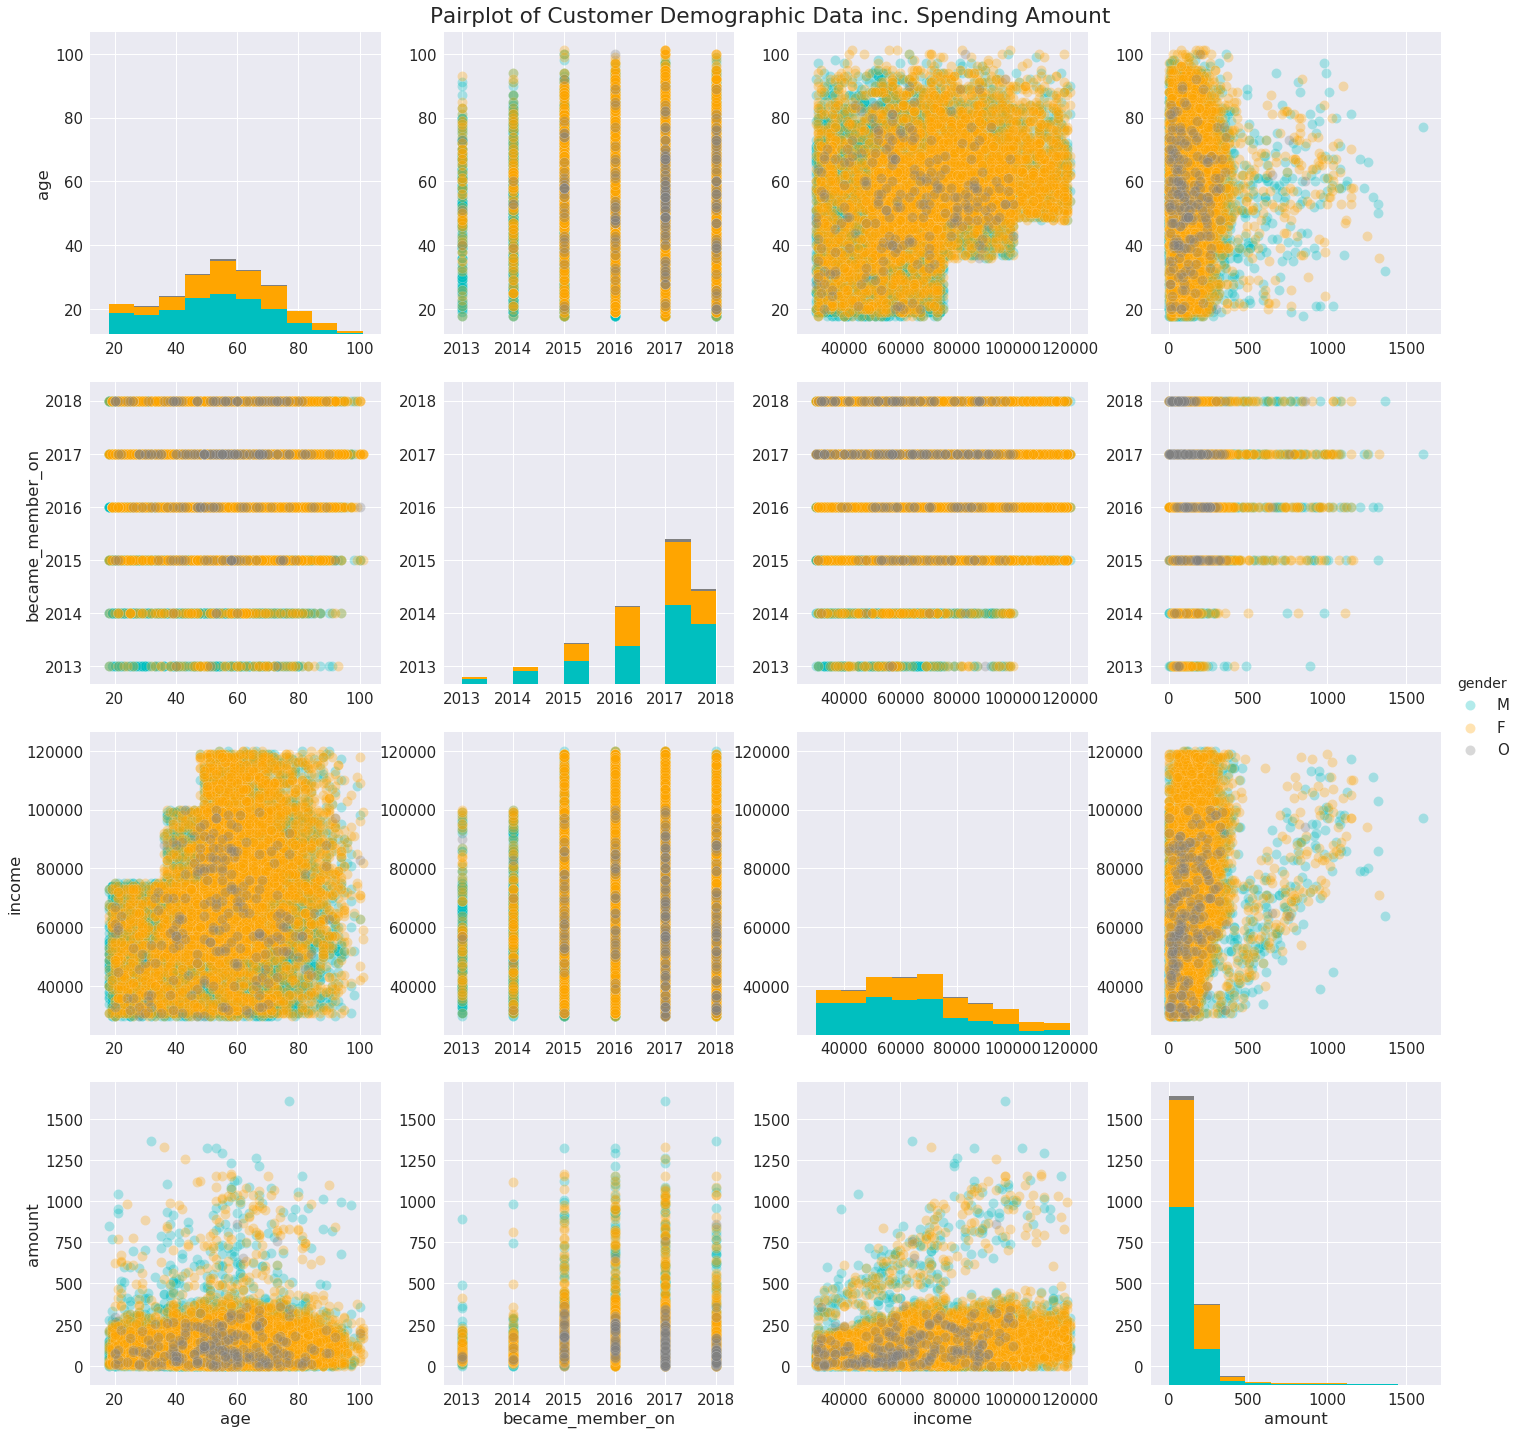

In [5]:
sns.set(font_scale=1.5)
fig = sns.pairplot(profile_with_amount,hue='gender',hue_order=['M',"F","O"],palette={"M":"c","F":"orange","O":"grey"}, size=5, plot_kws={"s": 100,"alpha":0.3})
#plt.title('Pairplot of Customer Demographic Data inc. Spending Amount')
plt.grid()
fig.fig.suptitle('Pairplot of Customer Demographic Data inc. Spending Amount',y=1)

plt.show()

Finding:<br>

1)	On Age distribution: Peak at 50 and there are more male users than female. Ratio of female users firstly became higher than male users when it came to 90 years old.<br>
2)	On distribution of members registration dates: Number of members are increasing rapidly in recent years. Higher ratio of male in early years and became more even starting from 2016.<br>
3)	On Income distribution: More male than female in the band of low incomes and more female than male in the band of high incomes<br>
4)	On Spending amount disctribution: Based on prices of products of Starbucks it is hard to imagine spending over 1000 dollars in 30 days! <br>
5)	On Income vs Age: Lower bound of income increases with age. <br>
6)	On Age vs Spending Amount and Income vs Spending Amount: In majority, spending amount across ages and income stay below 500 dollars. However there is a segment of high spending customers that spending amount is proportional to income. 


### 2.1.1 Segmentation for Analysis

In order to look into relevant features which lead to members to consume more, below groups are segmented for analysis: <br>
1) 20% of the highest spending <br>
2) 20% of the lowest spending amount <br>

On top of that, from the scatter plot of spending amount vs income, since there is an exeptional cluster of group of members whose spending amount is proportional to income and in general their spending are higher than majority of members, clustering of this group(called **cluster 1** for below) for further study is made for further analysis in section 2.6.<br>


In [6]:
#segment 20% of the highest spending and 20% of the lowest spending amount for comparison:

spending_seq = transcript_3.groupby('person')['amount'].sum().sort_values(ascending=False)

#take 1/20 of toppest spending users for comparison
high_spenders = spending_seq.head(int(len(spending_seq)*0.2)).index.values.tolist()
profile_high_spenders = profile_with_amount[profile_with_amount['id'].isin(high_spenders)]

#take 1/20 of lowest spending users for comparison
low_spenders = spending_seq.tail(int(len(spending_seq)*0.2)).index.values.tolist()
profile_low_spenders = profile_with_amount[profile_with_amount['id'].isin(low_spenders)]

In [7]:
#general info of distribution of high spending group
profile_high_spenders.describe()

age  became_member_on         income       amount
count  3400.000000       3400.000000    3400.000000  3400.000000
mean     57.107353       2016.286176   77378.235294   282.947150
std      16.190283          0.933907   20033.273215   172.785007
min      18.000000       2013.000000   30000.000000   168.660000
25%      48.000000       2016.000000   63000.000000   192.647500
50%      57.000000       2016.000000   76000.000000   226.785000
75%      68.000000       2017.000000   93000.000000   286.847500
max     101.000000       2018.000000  120000.000000  1608.690000

In [8]:
#general info of distribution of low spending group
profile_low_spenders.describe()

age  became_member_on         income       amount
count  2146.000000       3400.000000    2146.000000  3400.000000
mean     50.650047       2017.288235   53340.167754     8.830912
std      18.617211          0.868786   16923.269556     5.428946
min      18.000000       2013.000000   30000.000000     0.000000
25%      36.000000       2017.000000   40000.000000     4.580000
50%      51.000000       2017.000000   51000.000000     9.445000
75%      64.000000       2018.000000   64000.000000    13.450000
max      97.000000       2018.000000  119000.000000    17.440000

In [9]:
a=profile['id'].count()
b=transcript_3['amount'].sum()
c=profile_high_spenders['id'].count()
d=profile_high_spenders['amount'].sum()
e=len(low_spenders)
f=transcript_3[transcript_3['person'].isin(low_spenders)]['amount'].sum()
g=d/b*100
h=f/b*100


print("For {} members in the dataset, the total spending amount is ${:.0f}.".format(a,b))

print("For {} members in high spending group, the total spending amount is ${:.0f}({:.1f}%).".format(c,d,g))
print("For {} members in low spending group, the total spending amount is ${:.0f}({:.1f}%).".format(e,f,h))

For 17000 members in the dataset, the total spending amount is $1775452.
For 3400 members in high spending group, the total spending amount is $962020(54.2%).
For 3400 members in low spending group, the total spending amount is $30025(1.7%).


Since the size of cluster 1 is small, investigation is carried out separately in section 2.6.

### 2.2 Comparison between High and Low Spending Group - Demographic data

Observation of high spending group and low spending group comparing to overall data is made for comparison:

In [10]:
def hist_comparison(group1,group2,col,color,profile1,profile2):
    '''Function to create histogram to compare spender group to overall users by 'col':
    group1, group2: label on histogram for profile1 and profile2 respectively
    col: 'income','age' or 'became_member_on' (Metrics to compare. i.e. columns of profile)
    profile1, profile2: profile of 2 groups to be compared'''
    fig, ax = plt.subplots(figsize=(8,6))
    ax = sns.distplot(profile1[col].dropna(),kde=False,bins=20, color=color,hist_kws=dict(alpha=1))
    ax2 = ax.twinx()
    ax2 = sns.distplot(profile2[col].dropna(),kde=False,bins=20, color="grey", hist_kws=dict(alpha=0.4))
    ax.legend(labels=[group1],loc=2)
    ax2.legend(labels=[group2],loc=0)


    ax.set_ylabel('Count of {}'.format(str(group1)))
    ax2.set_ylabel('Count of {}'.format(str(group2)))
    fig.suptitle('Comparison of {} & {} on {}'.format(str(group1),str(group2),col, fontsize=14))
    plt.grid()
    plt.show()


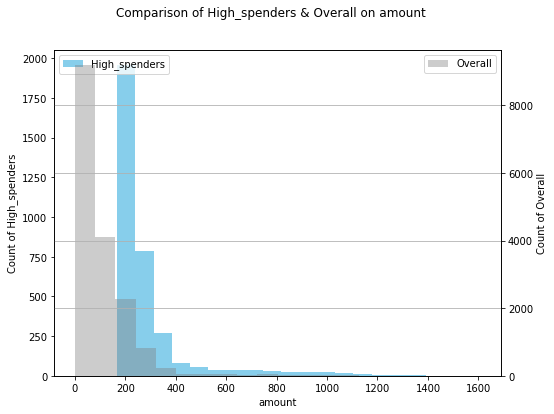

In [68]:
hist_comparison('High_spenders','Overall','amount','skyblue', profile_high_spenders,profile_with_amount)
hist_comparison('Low_spenders','Overall','amount','orange',profile_low_spenders,profile_with_amount)

age  became_member_on         income        amount
count  14825.000000      17000.000000   14825.000000  17000.000000
mean      54.393524       2016.635000   65404.991568    104.438351
std       17.383705          1.177624   21598.299410    125.922619
min       18.000000       2013.000000   30000.000000      0.000000
25%       42.000000       2016.000000   49000.000000     21.820000
50%       55.000000       2017.000000   64000.000000     69.405000
75%       66.000000       2017.000000   80000.000000    148.782500
max      101.000000       2018.000000  120000.000000   1608.690000

#### Distribution of member registration dates

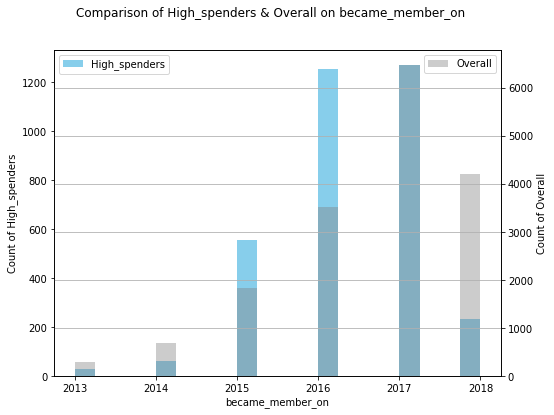

In [9]:
hist_comparison('High_spenders','Overall','became_member_on','skyblue', profile_high_spenders,profile)
hist_comparison('Low_spenders','Overall','became_member_on','orange',profile_low_spenders,profile)

On top of that I take a look for number of offers members received during the observation period

In [79]:
def graphic_offer_event_spenders(col1,spender_group,color,df1,df2,profile):
        '''Function to create histogram to compare spender group to overall users by events:
        spender_group: 'high_spenders' or 'low_spenders'
        col1: "offer received","offer viewed","offer completed"(type of event to compare on 1st chart)
        spender_group: 'high_spenders' or 'low_spenders'
        df1: df to compare(relate to spender_group)
        df2: df to be compared(Overall)
        profile:(customer profile data)'''
    
        #Plot for col1
        fig, ax = plt.subplots(figsize=(8,6))
        offer_received_count1 = df1[df1[col1].notna()].groupby('person')[col1].count().reset_index()
        ax = sns.distplot(offer_received_count1[col1].dropna(),kde=False,bins=20, color=color,hist_kws=dict(alpha=1))
        
        ax2 = ax.twinx()   
        offer_received_count2 = df2[df2[col1].notna()].groupby('person')[col1].count().reset_index()
        ax2 = sns.distplot(offer_received_count2[col1].dropna(),kde=False,bins=20, color="grey",hist_kws=dict(alpha=0.5))
        
             
        ax.set_title('Comparison of {a} from {b} to Overall'.format(a=col1,b=spender_group))
        ax.legend(labels=[spender_group],loc=2)
        ax2.legend(labels=['Overall'],loc=0)

        ax.set_ylabel('Count of {}'.format(str(spender_group)))
        ax2.set_ylabel('Count of Overall')
        plt.grid()        

        plt.show()

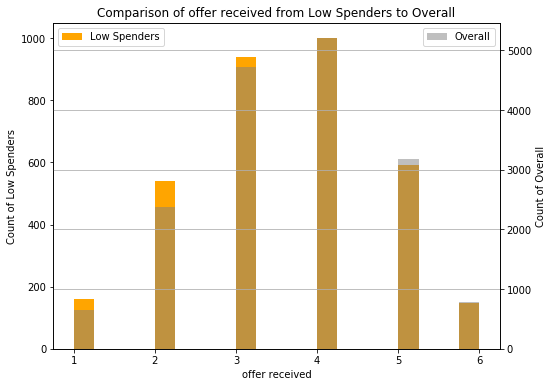

In [12]:
graphic_offer_event_spenders('offer received','High Spenders','skyblue',df_with_clusters[df_with_clusters['cluster']==1],df,profile)
graphic_offer_event_spenders('offer received','Low Spenders','orange',df[df['person'].isin(low_spenders)],df,profile)

#### Distribution of Age

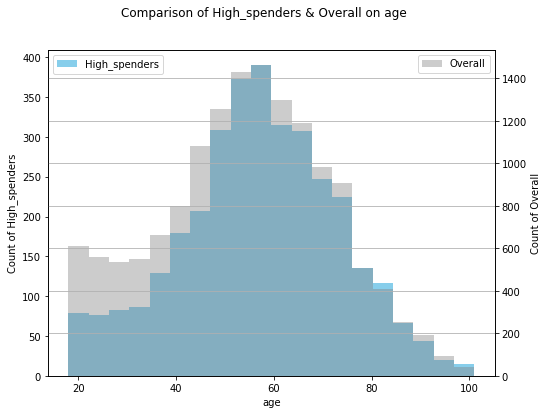

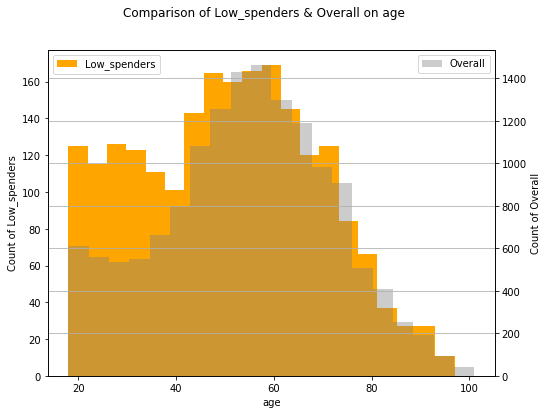

In [13]:
hist_comparison('High_spenders','Overall','age','skyblue', profile_high_spenders,profile)
hist_comparison('Low_spenders','Overall','age','orange', profile_low_spenders,profile)

#### Distribution of Income

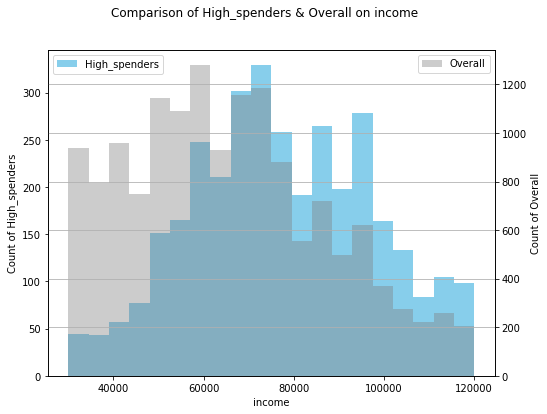

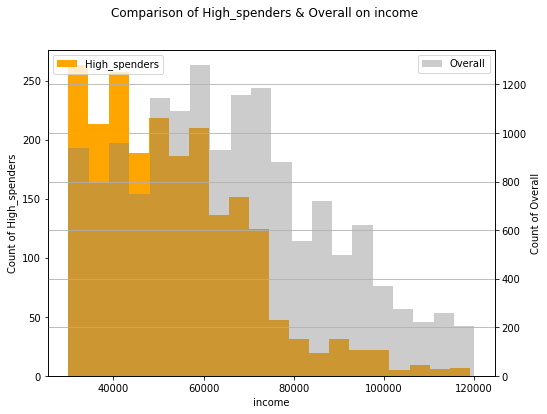

In [14]:
hist_comparison('High_spenders','Overall','income','skyblue', profile_high_spenders,profile)
hist_comparison('High_spenders','Overall','income','orange',profile_low_spenders,profile)

Build function to develop counting summary / sum summary:

In [15]:
def df_count_summary(col,sum_col,label_name,df):
    '''Create function to get summary of customer profile data by gender, by inputing customer profile data and 
    label name:
    col: the column to be analyzed
    sum_col: col to be summed
    label_name:label name for the group on plot
    profile: customer profile data
    '''
    
    df_count = df.groupby(col)[str(sum_col)].count().reset_index()
    df_count['category'] = str(label_name)
    df_count = df_count.rename({str(sum_col) : 'count'},axis=1)

    
    return df_count

In [12]:
def df_sum_summary(col,sum_col,label_name,df):
    '''Create function to get summary of customer profile data by gender, by inputing customer profile data and 
    label name:
    col: the column to be analyzed
    sum_col: col to be summed
    label_name:label name for the group on plot
    profile: customer profile data
    '''
    
    df_count = df.groupby(str(col))[str(sum_col)].sum().reset_index()
    df_count['category'] = str(label_name)
    df_count = df_count.rename({str(sum_col) : 'sum'},axis=1)

    
    return df_count

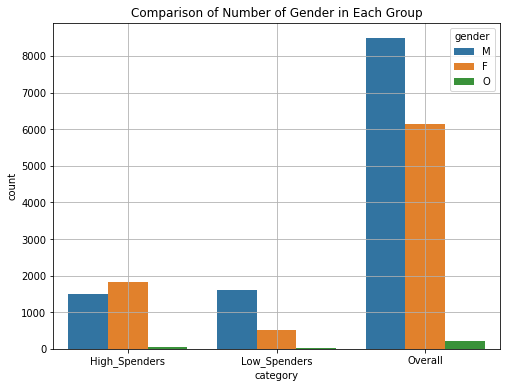

In [17]:
# get summary of Overall, high spenders and low spenders, then concatenate into whole summary
gender_count_overall = df_count_summary('gender','id','Overall',profile)
gender_count_high = df_count_summary('gender','id','High_Spenders',profile_high_spenders)
gender_count_low = df_count_summary('gender','id','Low_Spenders',profile_low_spenders)
gender_count = pd.concat([ gender_count_high,gender_count_low, gender_count_overall])

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=gender_count,x="category",y="count",hue="gender",hue_order=['M','F','O'])
ax.set_title('Comparison of Number of Gender in Each Group')

plt.grid()
plt.show()

Additional view angles putting parameters together:

In [18]:
#append two profile together identified by 'spending_group' label
profile_high_spenders['spending_group']='High_spending_group'
profile_low_spenders['spending_group']='Low_spending_group'
profile_spenders = profile_high_spenders.append(profile_low_spenders)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
fig = sns.lmplot(x='income',y='age',hue = 'spending_group', data=profile_spenders,fit_reg=False,scatter_kws={'alpha':0.5}, size = 6);
fig.fig.suptitle('Scatterplot of Age vs Income in High and Low Spending Group')
plt.grid()
plt.show()

In [31]:
fig = sns.lmplot(x='amount',y='age',hue = 'spending_group', data=profile_spenders,fit_reg=False,scatter_kws={'alpha':0.5}, size = 6);
fig.fig.suptitle('Scatterplot of Age vs Spending Amount in High and Low Spending Group')
plt.grid()
plt.show()

Findings: <br>
i) High spending group spend 283 dollars in average during the observation period while that in low spending group is 9 dollars.
ii) By means of member registration, High spending group tended to be registered earlier than overall and reached peak in 2017, while for low spending group members joined more recently in 2017 and 2018, but all receive similar number of offers between  1 to 6 with peak at 4.<br>
iii) High spending group concentrated at 50 - 70 years old, while for low spending group there is a obvious higher ratio of users below 40.<br>
iv) It happens to have weak to moderate relationship that groups of higher income are more willing to spend higher.


### 2.3 Comparison between High and Low Spending Group - Transaction Amount Analysis

#### Check for number of times each offer received by members

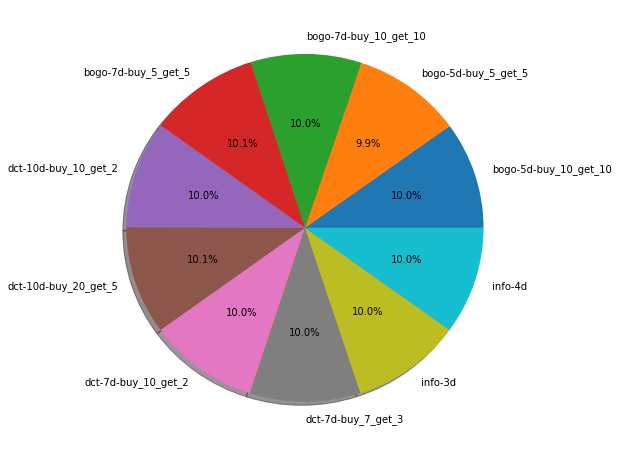

In [84]:
offer_count_summary = transcript_3[transcript_3['event']=='offer received'].groupby('offer_name')['event'].count().reset_index()
offer_count_summary = offer_count_summary.rename({'event':'count'},axis=1)

fig, ax = plt.subplots(figsize=(8,8))
plt.pie(offer_count_summary['count'],labels=offer_count_summary['offer_name'],autopct='%1.1f%%',shadow=True);

#### Check for spending sum on offers by groups

In [85]:
transcript_high_spenders = df_sum_summary('offer_name','amount','High_spenders',transcript_3[transcript_3['person'].isin(high_spenders)])
#transcript_cluster0 = df_count_summary('offer_name','cluster0',transcript_3[transcript_3['cluster']==0])

transcript_low_spenders = df_sum_summary('offer_name','amount','Low_spenders',transcript_3[transcript_3['person'].isin(low_spenders)])

offer_spending_summary = transcript_3.groupby('offer_name')['amount'].count().reset_index()
offer_spending_summary = offer_spending_summary.rename({'amount': 'sum'},axis=1)

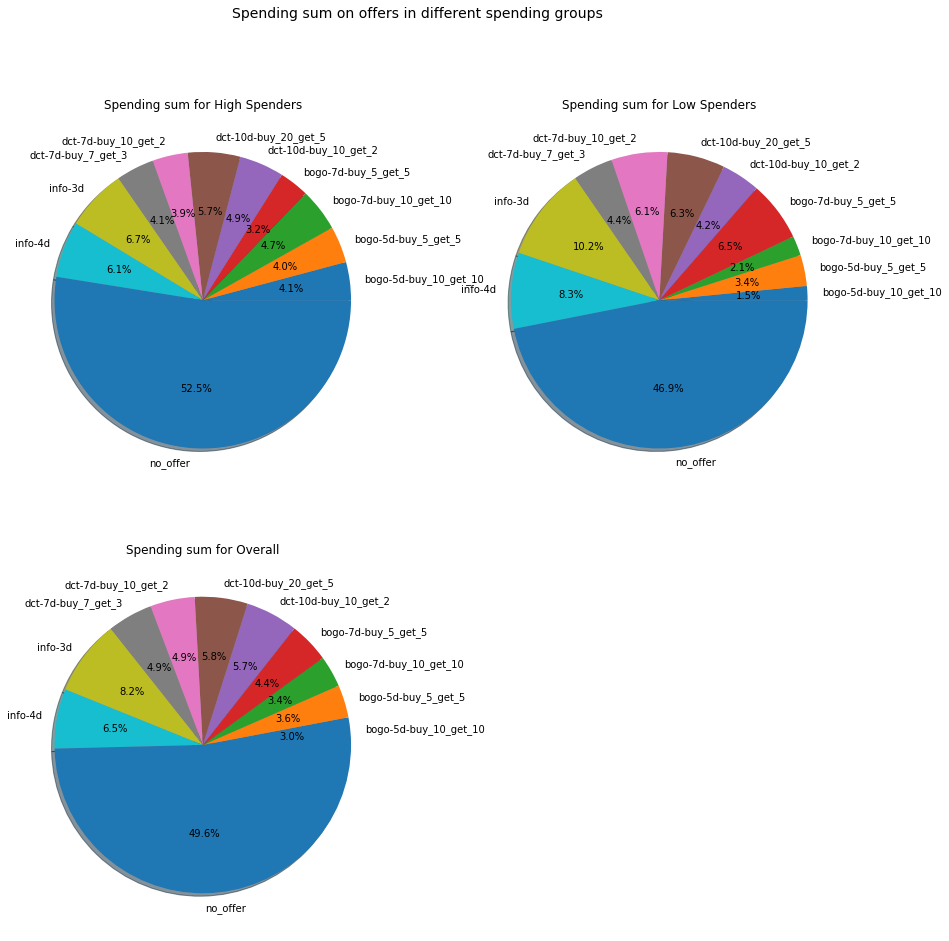

In [86]:
plt.figure(1, figsize=(15,15))
plt.suptitle('Spending sum on offers in different spending groups', fontsize=14)

plt.subplot(GridSpec(2, 2)[1, 0], aspect=1, title='Spending sum for Overall')
plt.pie(offer_spending_summary['sum'],labels=offer_spending_summary['offer_name'],autopct='%1.1f%%',shadow=True);


plt.subplot(GridSpec(2, 2)[0, 0], aspect=1, title='Spending sum for High Spenders')
plt.pie(transcript_high_spenders['sum'],labels=transcript_high_spenders['offer_name'],autopct='%1.1f%%',shadow=True);

plt.subplot(GridSpec(2, 2)[0, 1], aspect=1, title='Spending sum for Low Spenders')
plt.pie(transcript_low_spenders['sum'],labels=transcript_high_spenders['offer_name'],autopct='%1.1f%%',shadow=True);

plt.show()

Findings: <br>
Transaction not related to offer in 2 groups of members are both close to half of transactions but implicate different meanings: for high spending group, they were willing to spend even there was no offer; for low spending group, they still spent but the offers were not attractive to boost up spending amount. Moreover, low spending groups seems to be more responsive than high spending group by means of informational offer.<br>

By means of marketing strategy, one can consider to try if spending amount of high spending group can sustain by lowering down offers to this group, especially to those would complete offer even they do not receive or view offers which will be discussed in next section. For low spending group, one can consider to lower the difficulty of offer or increase informational offer to boost up transaction which shall increase the offer-related transaction ratio, but in longer run it is to target to resume high ratio of transaction without offer but boost up sales from these members accounts.<br>

By mean of BOGO offers, it makes sense that low spending group is more responsive to offers with longer offer validity and easier to achieve (i.e.buy-5-get-5 for 7 days) while high spending group is less sensitive that part of them may have spent more than requirement of the offers usually so there is no exceptionally high spending amount in the BOGO offers.
For discount offers, it seems longer validity slightly favors spending for high spending groups for the slightly higher transaction sum, but for low spending group there is not yet clear relationship between difficulty or offer validity to spending amount.


### 2.4 Comparison between High and Low Spending Group - Reaction Time Analysis


### 2.4.1 Analysis on Time for Offer Received and Completed 

#### Analysis of Offer received time

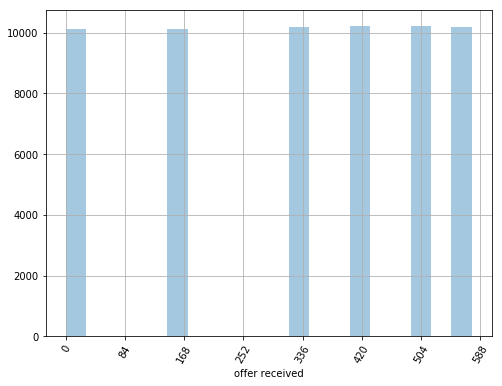

In [35]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.distplot(df['offer received'].dropna(),kde=False,bins=20)
ax.set_xticks(range(0,590,84))
ax.set_xticklabels(range(0,590,84),rotation=60)
ax.grid()
plt.show()

Findings:<br>
Distribution of offer received time reveals offers were received once every week in the beginning then, getting frequent to become 3 to 3.5 days.


#### Analysis of Offer viewed time

In [36]:
#create dataframe to complete elapse time counted from 'offer received'
df_time_analysis = df.copy()
df_time_analysis['offer received'] = df_time_analysis['offer received'] - df['offer received']
df_time_analysis['offer viewed'] = df_time_analysis['offer viewed'] - df['offer received']
df_time_analysis['offer completed'] = df_time_analysis['offer completed'] - df['offer received']

In [37]:
df_time_analysis['offer viewed'].describe()

count    46892.000000
mean        25.741065
std         32.655933
min          0.000000
25%          6.000000
50%         12.000000
75%         36.000000
max        438.000000
Name: offer viewed, dtype: float64

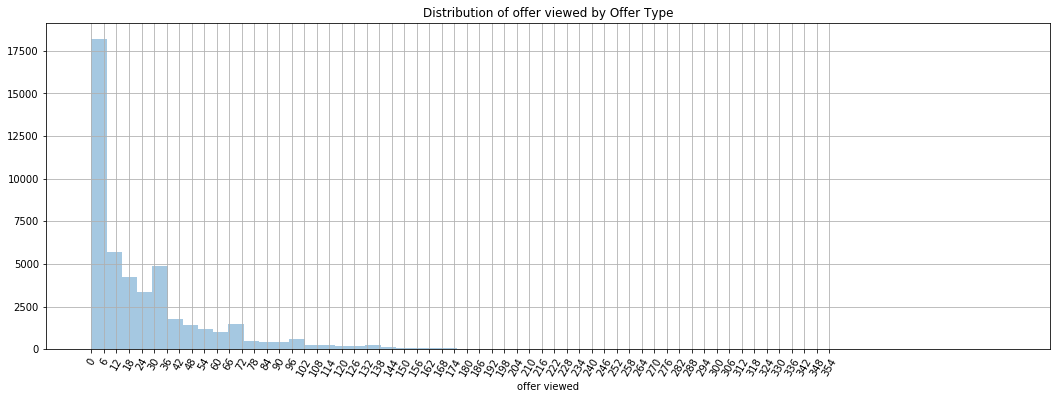

In [38]:
temp = df_time_analysis['offer viewed'].dropna()
fig, ax = plt.subplots(figsize=(18,6))
ax = sns.distplot(df_time_analysis['offer viewed'].dropna(),bins=60,kde=False)

ax.set_xticks(range(0,360,6))
ax.set_xticklabels(range(0,360,6),rotation=60)
ax.grid()

plt.title('Distribution of offer viewed by Offer Type')
plt.show()

#### Analysis of Offer viewed time

For this time we are only concern on flows with which users completed an offer after viewing the offer but exclude those completed offer without viewing.

In [39]:
df_time_analysis[(df_time_analysis['flow_label']=='F111')]['offer completed'].describe()

count    25663.000000
mean        61.078985
std         46.688884
min          6.000000
25%         24.000000
50%         48.000000
75%         90.000000
max        240.000000
Name: offer completed, dtype: float64

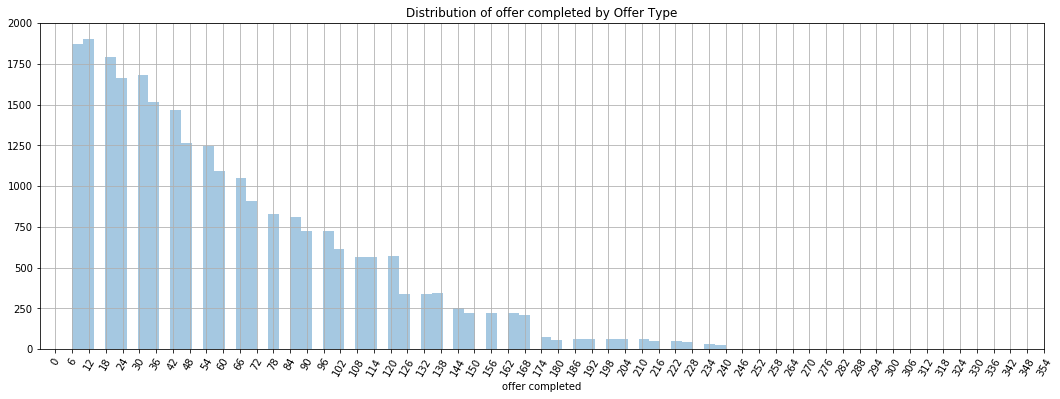

In [40]:
fig, ax = plt.subplots(figsize=(18,6))
ax = sns.distplot(df_time_analysis[(df_time_analysis['flow_label']=='F111')]['offer completed'].dropna(),kde=False,bins=60)

ax.set_xticks(range(0,360,6))
ax.set_xticklabels(range(0,360,6),rotation=60)
ax.grid()

plt.title('Distribution of offer completed by Offer Type')
plt.show()

Findings:<br>
It can be observed that half of the members viewed offers in first 12 hours they received, and half of members would complete offers in 48 hours if they felt interested. 

### 2.4.2 Analysis on Time for Transaction

#### Figure on number of transaction in High Spending Group:

In [58]:
transcript_3[transcript_3['person'].isin(high_spenders)].groupby('person')['amount'].count().describe()

count    3400.000000
mean       11.872941
std         4.036648
min         2.000000
25%         9.000000
50%        11.000000
75%        14.000000
max        36.000000
Name: amount, dtype: float64

#### Figure on time interval of transaction in High Spending Group:

In [44]:
transcaction_high_spenders = transcript_3[(transcript_3['person'].isin(high_spenders))&(transcript_3['event']=='transaction')]
transcaction_high_spenders = transcaction_high_spenders.sort_values(['person','time'])

transcaction_high_spenders['time_diff']=transcaction_high_spenders['time']-transcaction_high_spenders['time'].shift(1)

In [45]:
#check how many rows are of -ve. If it is 3399, then it just happens when there is change of person id since time is reset
transcaction_high_spenders[transcaction_high_spenders['time_diff']<0]['person'].count()

3399

In [57]:
# change time as 0 to np.nan
transcaction_high_spenders['time_diff']=np.where(transcaction_high_spenders['time_diff']<0,np.nan,transcaction_high_spenders['time_diff'])
transcaction_high_spenders['time_diff'].describe()

count    36968.000000
mean        52.864694
std         52.688526
min          6.000000
25%         18.000000
50%         36.000000
75%         72.000000
max        450.000000
Name: time_diff, dtype: float64

#### Figure on number of transaction in Low Spending Group:

In [60]:
transcript_3[transcript_3['person'].isin(low_spenders)].groupby('person')['amount'].count().describe()

count    3400.000000
mean        3.774412
std         2.472441
min         0.000000
25%         2.000000
50%         4.000000
75%         5.000000
max        16.000000
Name: amount, dtype: float64

#### Figure on time interval of transaction in Low Spending Group:

In [61]:
transcaction_low_spenders = transcript_3[(transcript_3['person'].isin(low_spenders))&(transcript_3['event']=='transaction')]
transcaction_low_spenders = transcaction_low_spenders.sort_values(['person','time'])

transcaction_low_spenders['time_diff']=transcaction_low_spenders['time']-transcaction_low_spenders['time'].shift(1)

transcaction_low_spenders['time_diff']=np.where(transcaction_low_spenders['time_diff']<0,np.nan,transcaction_low_spenders['time_diff'])
transcaction_low_spenders['time_diff'].describe()


count    10032.000000
mean       112.836722
std         96.201847
min          0.000000
25%         36.000000
50%         84.000000
75%        168.000000
max        666.000000
Name: time_diff, dtype: float64

Findings:<br>
In high spending group, in averge members spend in Starbucks 11 times out of 30 days(once every 3 days), compared to 4 times(once every 8 days) for low spending group.
And if they consume, half of high spending group spend every 1.5 days while low spending groups spend every 3.5 days.
The frequency of transaction of high spending group is much higher than the number of offers received(peak at 4 and max at 6).
Moreover by means of spending amount which high spending group spends 83 dollars in average during observation period, it seems consumption in Starbucks is a habit that offers with low difficulty(e.g. buy-5-get-5) seems not necessary.

### 2.5 Comparison between High and Low Spending Group - Flow Analysis

This part will look into number of times members from high and low spending groups completed each flow types by offers to investigate their behavior difference. The meaning of flow labels in the plots for reference:<br>
F001: Not Received or Viewed but Completed the offer<br>
F100: Received but not Viewed or Completed the offer<br>   F101: Received & Completed the offer but not Viewed<br>   F110: Received & Viewed but not completed the offer<br>
F111: Received, Viewed & completed the offer

In [87]:
# create dataframe indexed by offer name and flow label

#flow_high_spenders = df_with_clusters[df_with_clusters['cluster']==1].groupby(['offer_name','flow_label'])[df_with_clusters.columns[1]].count().reset_index()
#flow_high_spenders['category'] = str('High_spenders')
#flow_high_spenders = flow_high_spenders.rename({str(df_with_clusters.columns[1]) : 'count'},axis=1)

flow_high_spenders = df[df['person'].isin(high_spenders)].groupby(['offer_name','flow_label'])[df.columns[1]].count().reset_index()
flow_high_spenders['category'] = str('High_spenders')
flow_high_spenders = flow_high_spenders.rename({str(df_with_clusters.columns[1]) : 'count'},axis=1)


flow_low_spenders = df[df['person'].isin(low_spenders)].groupby(['offer_name','flow_label'])[df.columns[1]].count().reset_index()
flow_low_spenders['category'] = str('Low_spenders')
flow_low_spenders = flow_low_spenders.rename({str(df.columns[1]) : 'count'},axis=1)

flow_overall = df.groupby(['offer_name','flow_label'])[df.columns[1]].count().reset_index()
flow_overall['category'] = str('Overall')
flow_overall = flow_overall.rename({str(df_with_clusters.columns[1]) : 'count'},axis=1)


flow_groups = pd.concat([flow_high_spenders, flow_low_spenders, flow_overall])

#since some of the flow types are 0, need to fill those rows before plotting
flow_groups=flow_groups.set_index(['offer_name','category','flow_label']).unstack(-1).fillna(0).stack(1).reset_index()

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


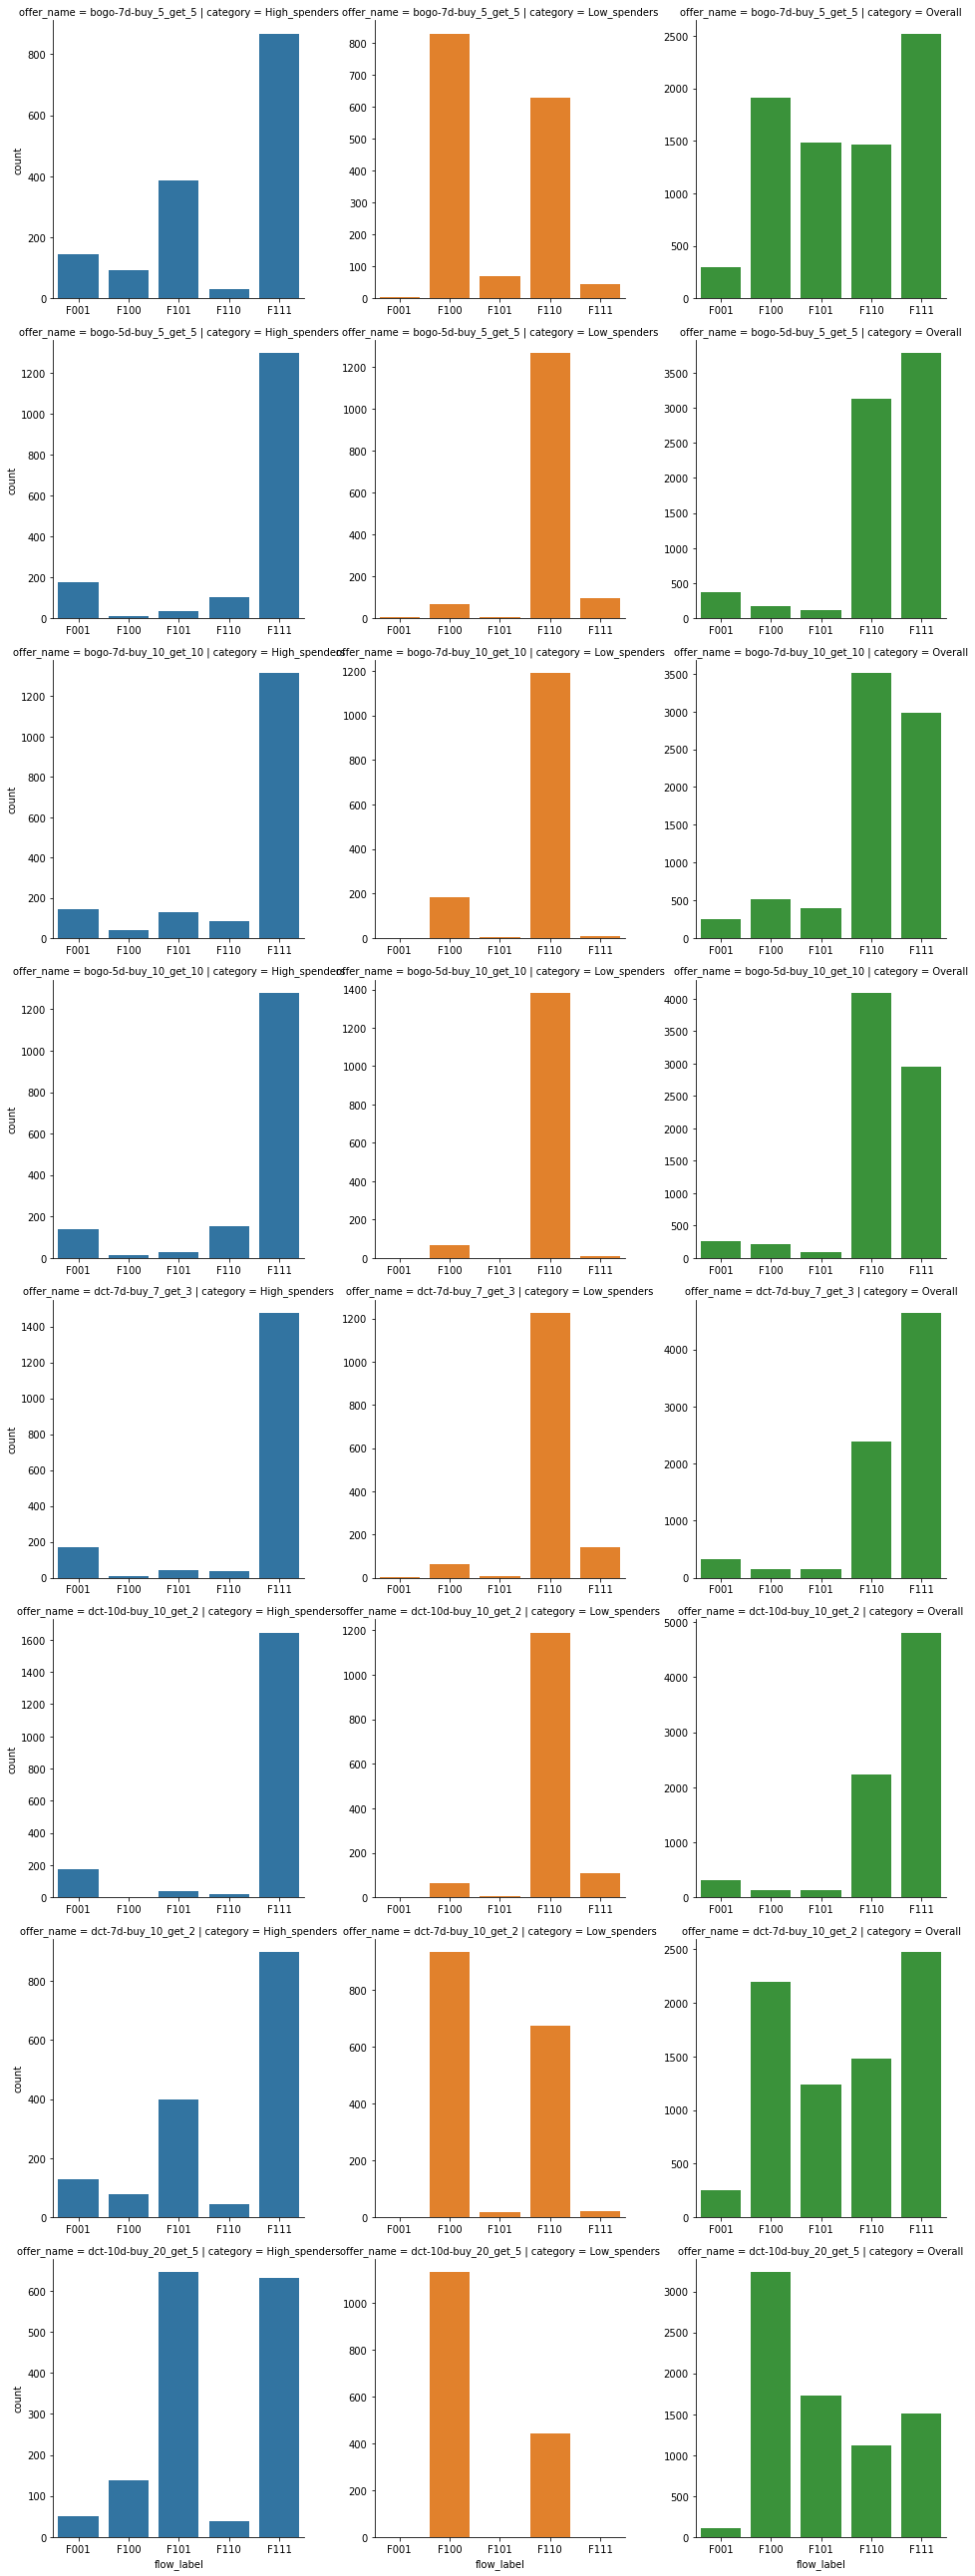

In [88]:
g = sns.FacetGrid(flow_groups , col="category", row="offer_name", hue="category",
                  row_order=['bogo-7d-buy_5_get_5',
                            'bogo-5d-buy_5_get_5',
                            'bogo-7d-buy_10_get_10',
                            'bogo-5d-buy_10_get_10',
                            'dct-7d-buy_7_get_3',                            
                            'dct-10d-buy_10_get_2',
                            'dct-7d-buy_10_get_2',
                            'dct-10d-buy_20_get_5'],size=4.5,sharey=False)
g.map(sns.barplot,"flow_label","count")

plt.show()

Findings:<br>
For high spending group, a majority of users completed the offers after receiving and viewing. Moreover there is a remarkable portion of flow types which users complete offers without viewing if the difficulty is low or validity period is long, which implies there is a portion of high spending users who were inactive App users and completed offers just because they consume as comsumption habit.<br>

For low spending group, most of the members could not complete the offers, no matter receiving with or without viewing the offers. Ratio of receiving without viewing is high for some offers, reveals that this group of users, which tend to be younger generation with lower income was not high, does not show interest to check updates in the App regularly.



### 2.6 Analysis on Cluster 1(the group of customers whose spending amount is proportional to income)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


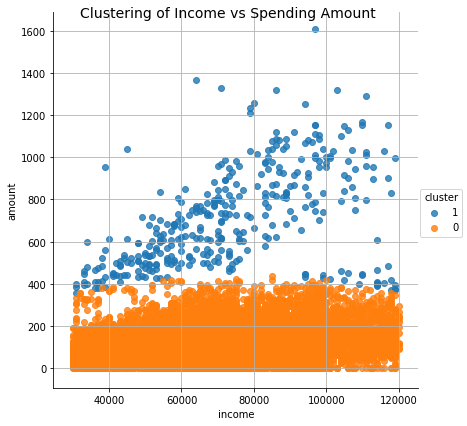

In [10]:
#cluster the group of customers whose spending amount is proportional to income (called cluster 1 for below) 

profile_with_amount1 = profile_with_amount.dropna(subset=['income','amount'])

scaler = StandardScaler()

income_spending_scaled=scaler.fit_transform(profile_with_amount1[['income','amount']])

dbscan = cluster.DBSCAN(eps=1,min_samples=1300)

clustering_labels_1 = dbscan.fit_predict(income_spending_scaled)

profile_with_amount1['cluster'] = pd.Series(clustering_labels_1,index=profile_with_amount1.index)
profile_with_amount1['cluster'].replace(-1,1,inplace=True)
#plt.scatter(profile_with_amount1['income'], profile_with_amount1['amount'], c=profile_with_amount1['label']);
fig = sns.lmplot(x='income',y='amount', hue = 'cluster',hue_order = [1,0],data=profile_with_amount1,fit_reg=False, size=6)
plt.grid()
fig.fig.suptitle('Clustering of Income vs Spending Amount', fontsize=14)
plt.show()

In [11]:
#profile_cluster_0 = profile_with_amount1[profile_with_amount1['cluster']==0]
profile_cluster1 = profile_with_amount1[profile_with_amount1['cluster']==1]

#merge cluster label into df
df_with_clusters = df.merge(profile_with_amount1[['person','cluster']], how='left')

#merge cluster label into transcript
transcript_3 = transcript_3.merge(profile_with_amount1[['person','cluster']], how='left')

In [75]:
a=profile['id'].count()
b=transcript_3['amount'].sum()
c=profile_high_spenders['id'].count()
d=profile_high_spenders['amount'].sum()

g=d/b*100

i=profile_cluster1['id'].count()
j=profile_cluster1['amount'].sum()
k=j/b

print("For {} members in the dataset, the total spending amount is ${:.0f}.".format(a,b))

print("For {} members in high spending group, the total spending amount is ${:.0f}({:.1f}%).".format(c,d,g))
print("For {} members in cluster 1, the total spending amount is ${:.0f}({:.1f}%).".format(i,j,k))


For 17000 members in the dataset, the total spending amount is $1775452.
For 3400 members in high spending group, the total spending amount is $962020(54.2%).
For 356 members in cluster 1, the total spending amount is $253216(0.1%).


In [76]:
#form list of member id which is in cluster 1
cluster1_person_list = df_with_clusters[df_with_clusters['cluster']==1]['person'].drop_duplicates().tolist()

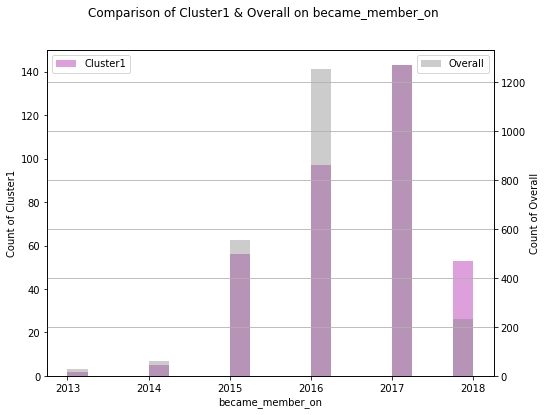

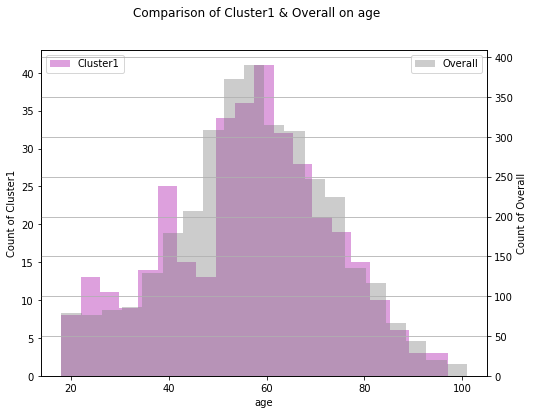

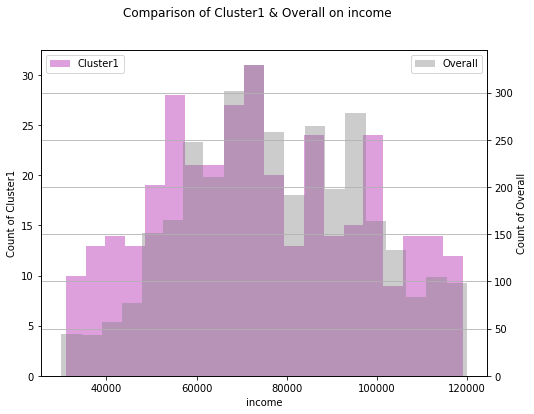

In [77]:
#Study on demographic data
hist_comparison('Cluster1','Overall','became_member_on','plum', profile_cluster1,profile_high_spenders)

hist_comparison('Cluster1','Overall','age','plum', profile_cluster1,profile_high_spenders)

hist_comparison('Cluster1','Overall','income','plum', profile_cluster1,profile_high_spenders)


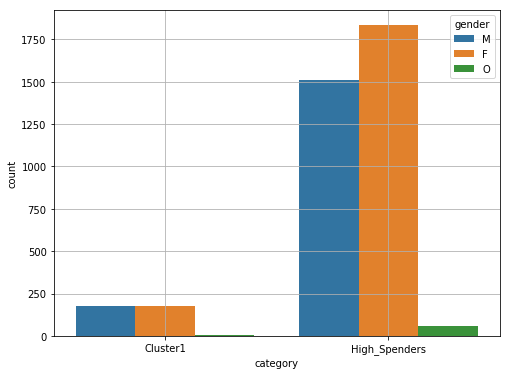

In [82]:
gender_count_cluster1 = df_count_summary('gender','id','Cluster1',profile_cluster1)
gender_count_high = df_count_summary('gender','id','High_Spenders',profile_high_spenders)

gender_count_2 = pd.concat([gender_count_cluster1,gender_count_high])


fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=gender_count_2,x="category",y="count",hue="gender",hue_order=['M','F','O'])

plt.grid()
plt.show()

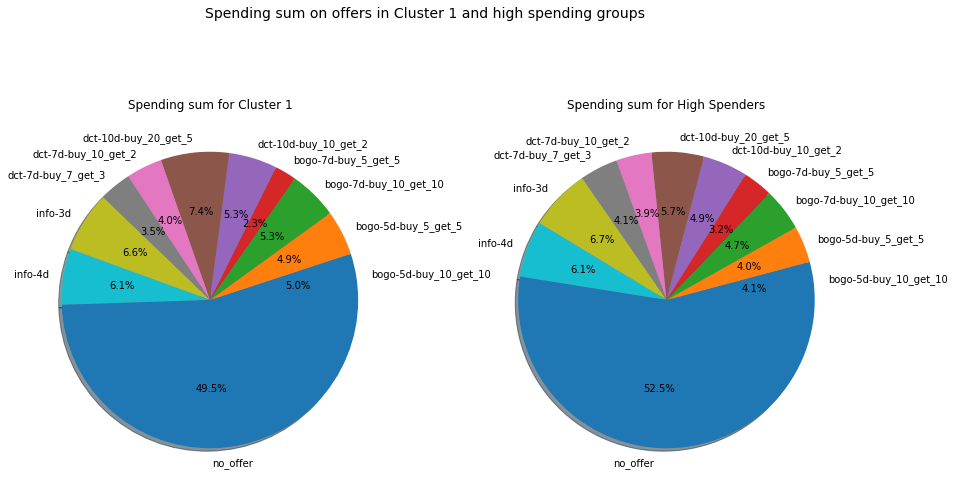

In [89]:
transcript_cluster1 = df_sum_summary('offer_name','amount','Cluster1',transcript_3[transcript_3['person'].isin(cluster1_person_list)])
#transcript_cluster0 = df_count_summary('offer_name','cluster0',transcript_3[transcript_3['cluster']==0])

plt.figure(1, figsize=(15,15))
plt.suptitle('Spending sum on offers in Cluster 1 and high spending groups', fontsize=14)

plt.subplot(GridSpec(2, 2)[0, 0], aspect=1, title='Spending sum for Cluster 1')
plt.pie(transcript_cluster1['sum'],labels=transcript_cluster1['offer_name'],autopct='%1.1f%%',shadow=True);

plt.subplot(GridSpec(2, 2)[0, 1], aspect=1, title='Spending sum for High Spenders')
plt.pie(transcript_high_spenders['sum'],labels=transcript_high_spenders['offer_name'],autopct='%1.1f%%',shadow=True);

plt.show()



/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


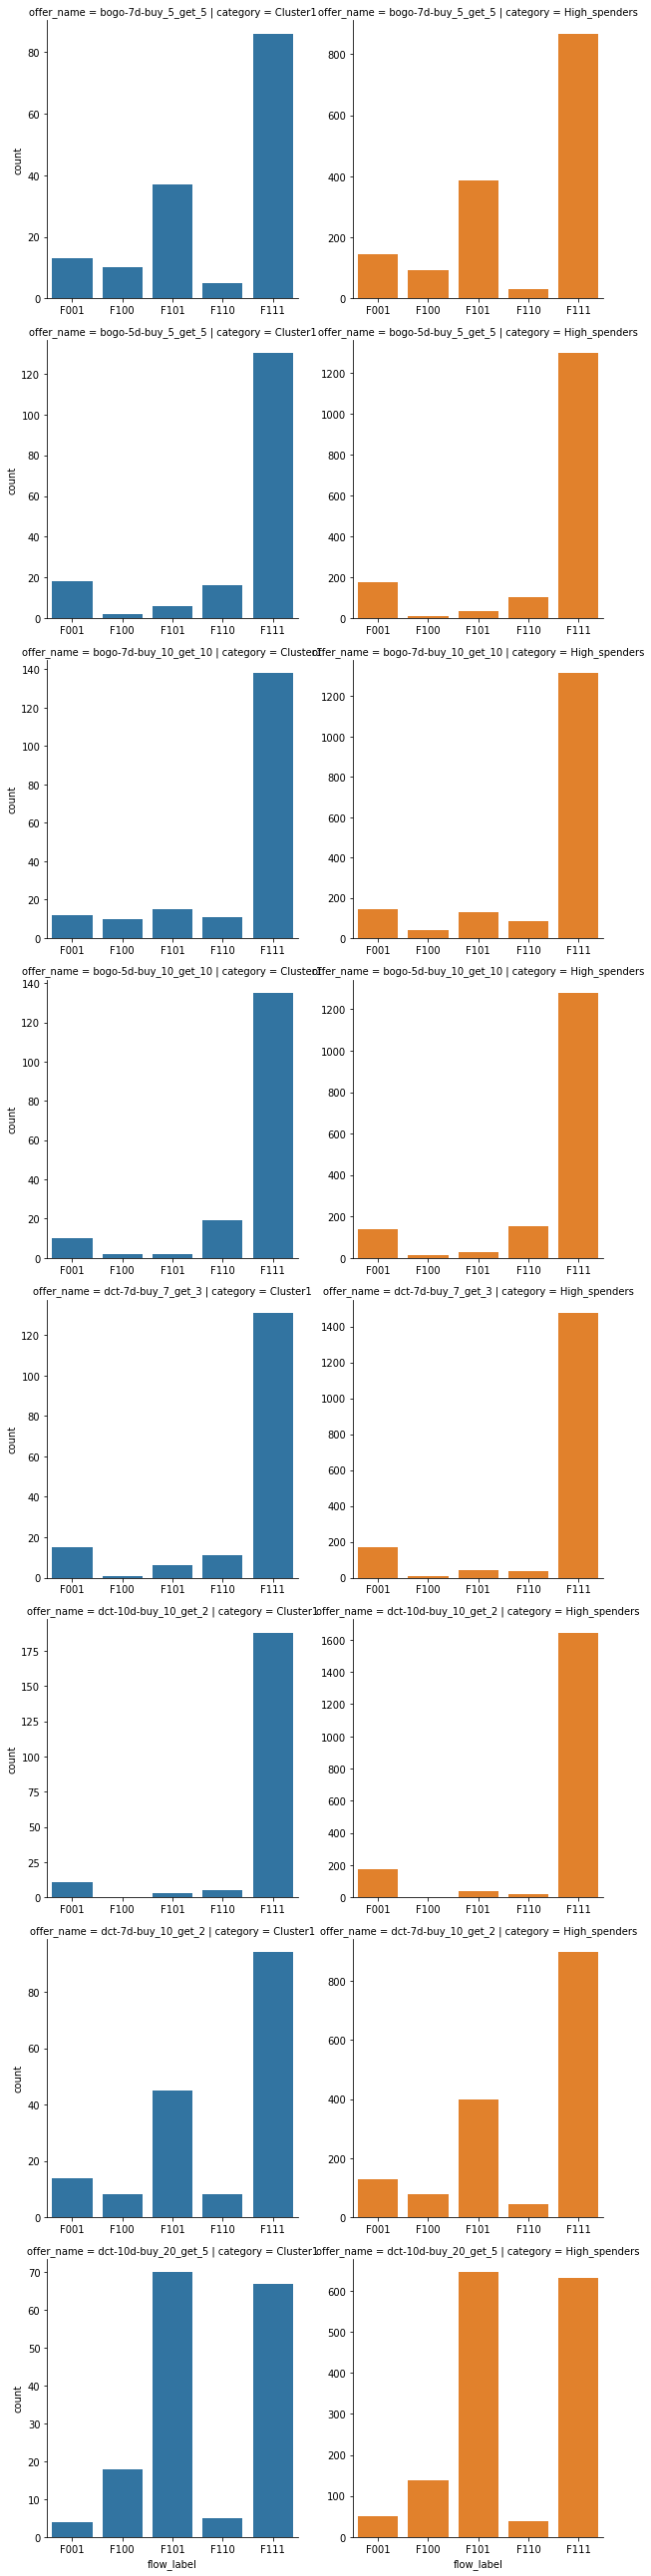

In [90]:
flow_cluster1 = df[df['person'].isin(cluster1_person_list)].groupby(['offer_name','flow_label'])['person'].count().reset_index()
flow_cluster1['category'] = str('Cluster1')
flow_cluster1 = flow_cluster1.rename({'person' : 'count'},axis=1)

flow_group_2 = pd.concat([flow_cluster1,flow_high_spenders])

#since some of the flow types are 0, need to fill those rows before plotting
flow_group_2=flow_group_2.set_index(['offer_name','category','flow_label']).unstack(-1).fillna(0).stack(1).reset_index()


g = sns.FacetGrid(flow_group_2, col="category", row="offer_name", hue="category",
                  row_order=['bogo-7d-buy_5_get_5',
                            'bogo-5d-buy_5_get_5',
                            'bogo-7d-buy_10_get_10',
                            'bogo-5d-buy_10_get_10',
                            'dct-7d-buy_7_get_3',                            
                            'dct-10d-buy_10_get_2',
                            'dct-7d-buy_10_get_2',
                            'dct-10d-buy_20_get_5'],size=4.5,sharey=False)
g.map(sns.barplot,"flow_label","count")

plt.show()

Findings:<br>
It does not appear apparent difference between Cluster1 and high spending group by means of demographic data, transaction distribution in offers or customer behaviors by means of flow types.
Therefore, we can only look into the relationship between income and transaction record.

#### Look into single transaction amount vs income of members

In [54]:
#form list of member id which consume the highest(length same as length of cluster1)
highest_transaction_users = transcript.sort_values(by='amount',ascending=False)['person'][:len(cluster1_person_list)]

#find intersect of two list and check the size
intersect_user = np.intersect1d(cluster1_person_list,highest_transaction_users)
print("There are {a} members in cluster1 and {b} of them intersect with the highest {a} transaction record in the dataset.".
      format(a=len(cluster1_person_list),b=len(intersect_user)))

There are 356 members in cluster1 and 322 of them intersect with the highest 356 transaction record in the dataset.


In [55]:
profile_with_amount[profile_with_amount['person'].isin(intersect_user)].sort_values(by='income')

age  became_member_on gender                                id  \
6407   30.0              2016      M  0ef5270c4e634eccbfcf23a172921a8d   
16801  33.0              2017      M  106a0aa3ec754404b210cfce31790970   
9248   25.0              2017      M  29fdfc06b7ea4373907b1f26389a675a   
4759   76.0              2016      F  2db807a13372444b9eb716d66479433b   
5239   32.0              2017      F  02b7a80a321c4b078af92d494cc0f012   
1506   23.0              2017      M  a6937b83abe649b38e3c019e559345df   
697    43.0              2016      M  a2acc24642b34dbca491bb3c5ba2b2ec   
14798  21.0              2016      F  af5f147000ff48199b012df26bf97e15   
8056   22.0              2017      M  efef288af381446eb0b32d0e42371846   
10767  74.0              2017      M  34962645e76943bab69e9aa8c335e574   
9829   83.0              2016      F  4180446d6f81480cbc467b969b9559bc   
14258  65.0              2017      M  e0d0940a726544d29b8c93adf7c39fa2   
2014   41.0              2017      M  a8fc8a1034d34edf9bc2c6dfaec408e1   
16929  30.0              2017      M  d77c7af5ddae45138fd6a6f427d53766   
871    38.0              2018      M  ae27549c1fcc4407a7d5d270928ff0ab   
11999  61.0              2017      M  173b015909cc4dd5b74baaf3320a1646   
10741  21.0              2016      M  9ae56116908640fc83477982da0aaec4   
5399   74.0              2016      F  29033cded35c48d99cf6ef99f91fad66   
10547  38.0              2017      M  2c94cfa1e2544b5aa43ba37306d5c79f   
284    26.0              2017      F  a4579681ffca49cfbff6f5453a49bf76   
9857   36.0              2016      M  7deb44388feb4a9ea7681464bf16b8dd   
812    72.0              2015      F  0951cc66d2f841e99cce016730c3f6da   
16133  31.0              2017      M  780b53dde0774138b7feb0506f0bc84d   
4172   58.0              2015      F  240eaede0a3c438ca9e85bfcc2fac550   
1512   35.0              2017      M  b6f831aeda5f4183ab523e07e1eff7f7   
5751   46.0              2017      F  a4d1b75470fe4c4ea250788d4683d486   
10964  77.0              2017      F  32d2e1cc3f46442c8992f359385bd032   
15474  78.0              2017      M  75d248be69924f96abe06b644dd0b1c6   
9564   65.0              2016      F  b7bbde316be54f6f9100f8ec7d7e3dbc   
13100  28.0              2016      F  cb451cfac44245aaa4fd0bb64602e07d   
...     ...               ...    ...                               ...   
4205   57.0              2017      F  df1e6d50effb4af28aff99f69fd3f394   
10652  53.0              2015      M  626df8678e2a4953b9098246418c9cfa   
811    90.0              2016      F  1c05e4a68fc04d3da27454cb7eaa6144   
12322  74.0              2017      F  e5577291ea424ed2b73957bdbfd295ab   
11737  92.0              2017      F  8d31a8a4b5d24b10a54da118855f7132   
13304  52.0              2015      M  de9f480f3cd54696a343fdfc6555dd57   
6689   70.0              2015      F  05bedc6bbcc64a41b1745f6efe00776d   
11305  64.0              2018      F  7a153a17d9754d3686c37684146fb681   
6354   84.0              2017      F  f4fa477e66204420b0c0b90448596a46   
15250  60.0              2016      M  a73cf044395d46ea804f688490ad9227   
5850   56.0              2016      M  0a7c7af5e814481b8e4a4a3b6e2f8697   
8697   71.0              2018      F  9e523a3e05e14fd0bfec8ac108ce2cab   
2191   52.0              2016      F  d820adac939d46078131f147d99d3f85   
4044   63.0              2017      F  72238c93bdfb4272a1f104a59ccc3a37   
2770   66.0              2016      F  83313f9487fe41ca990d393127406161   
2681   58.0              2015      F  6cf884a6c5ae4b2daccb6d3108028fef   
6918   53.0              2016      F  dce784e26f294101999d000fad9089bb   
4129   88.0              2016      M  f47051cad4844338be9332c33ddba9ef   
14496  67.0              2017      F  c35d2009f1a1434fb4f59658f14ad0ec   
13211  55.0              2016      M  52959f19113e4241a8cb3bef486c6412   
12111  58.0              2017      F  490ca12f690d413aaf75d08c56067ea4   
2177   53.0              2016      M  585a0bbfeba2460faac73d8e4f98e1a6   
7368   62.0 

In [ ]:
#transcript_m1[transcript_m1['amount'].notna()].sort_values(by='amount',ascending=False)

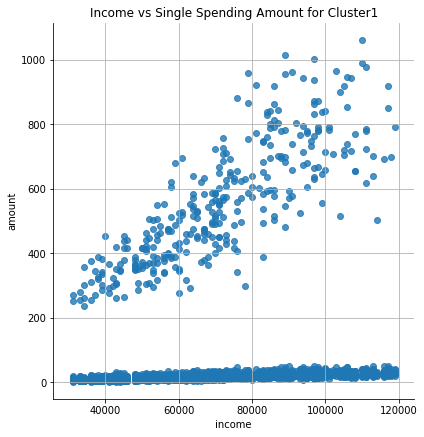

In [62]:
#try to plot scatter plot for spending amount vs income to find relationship
transcript_h = transcript_3[transcript_3['person'].isin(intersect_user)].sort_values(by='amount')
transcript_h = transcript_h.merge(profile_with_amount[['person','income']],on='person',how='left')

sns.lmplot(x='income',y='amount',data=transcript_h,fit_reg=False,size=6)
plt.grid()
ax = plt.gca()
ax.set_title("Income vs Single Spending Amount for Cluster1")
plt.show()

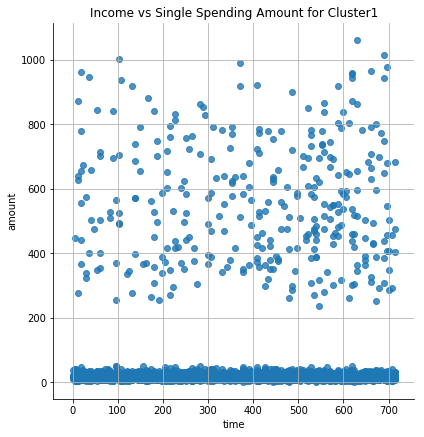

In [64]:
#also check if there is time-dependent factor(e.g. Carnival to boost sales) causing the exceptionally high single spending
sns.lmplot(x='time',y='amount',data=transcript_h,fit_reg=False,size=6)
plt.grid()
ax = plt.gca()
ax.set_title("Income vs Single Spending Amount for Cluster1")
plt.show()

In [65]:
transcript_h['amount'].describe()

count    3471.000000
mean       68.749732
std       168.688107
min         1.560000
25%        11.910000
50%        17.430000
75%        25.035000
max      1062.280000
Name: amount, dtype: float64

In [66]:
#Check transaction history of random user to see how exceptionally high transaction record happened 
transcript_h[transcript_h['person']==random.choice(intersect_user[:100])].sort_values(by='time')

event                            person  time  \
3500   offer received  0215efe5136d4a038cb81eae92d59368     0   
3501     offer viewed  0215efe5136d4a038cb81eae92d59368     0   
3502  offer completed  0215efe5136d4a038cb81eae92d59368     6   
1269      transaction  0215efe5136d4a038cb81eae92d59368     6   
2606      transaction  0215efe5136d4a038cb81eae92d59368    30   
2283      transaction  0215efe5136d4a038cb81eae92d59368    48   
1104      transaction  0215efe5136d4a038cb81eae92d59368   108   
760       transaction  0215efe5136d4a038cb81eae92d59368   132   
3325      transaction  0215efe5136d4a038cb81eae92d59368   138   
1118      transaction  0215efe5136d4a038cb81eae92d59368   156   
2046      transaction  0215efe5136d4a038cb81eae92d59368   204   
3503   offer received  0215efe5136d4a038cb81eae92d59368   336   
3504     offer viewed  0215efe5136d4a038cb81eae92d59368   342   
3505   offer received  0215efe5136d4a038cb81eae92d59368   408   
3506     offer viewed  0215efe5136d4a038cb81eae92d59368   432   
1520      transaction  0215efe5136d4a038cb81eae92d59368   456   
3507   offer received  0215efe5136d4a038cb81eae92d59368   504   
3508     offer viewed  0215efe5136d4a038cb81eae92d59368   528   
873       transaction  0215efe5136d4a038cb81eae92d59368   534   
3509  offer completed  0215efe5136d4a038cb81eae92d59368   534   
3510  offer completed  0215efe5136d4a038cb81eae92d59368   534   
1333      transaction  0215efe5136d4a038cb81eae92d59368   552   
3511   offer received  0215efe5136d4a038cb81eae92d59368   576   
3512     offer viewed  0215efe5136d4a038cb81eae92d59368   588   
1276      transaction  0215efe5136d4a038cb81eae92d59368   618   
3513  offer completed  0215efe5136d4a038cb81eae92d59368   618   
2092      transaction  0215efe5136d4a038cb81eae92d59368   696   

                              offer id  amount  reward            offer_name  \
3500  fafdcd668e3743c1bb461111dcafc2a4     NaN     NaN  dct-10d-buy_10_get_2   
3501  fafdcd668e3743c1bb461111dcafc2a4     NaN     NaN  dct-10d-buy_10_get_2   
3502  fafdcd668e3743c1bb461111dcafc2a4     NaN     2.0  dct-10d-buy_10_get_2   
1269  fafdcd668e3743c1bb461111dcafc2a4   14.43     NaN  dct-10d-buy_10_get_2   
2606                              None   25.08     NaN              no_offer   
2283                              None   21.71     NaN              no_offer   
1104                              None   13.37     NaN              no_offer   
760                               None   11.20     NaN              no_offer   
3325                              None  570.78     NaN              no_offer   
1118                              None   13.43     NaN              no_offer   
2046                              None   19.78     NaN              no_offer   
3503  0b1e1539f2cc45b7b9fa7c272da2e1d7     NaN     NaN  dct-10d-buy_20_get_5   
3504  0b1e1539f2cc45b7b9fa7c272da2e1d7     NaN     NaN  dct-10d-buy_20_get_5   
3505  5a8bc65990b245e5a138643cd4eb9837     NaN     NaN               info-3d   
3506  5a8bc65990b245e5a138643cd4eb9837     NaN     NaN               info-3d   
1520  5a8bc65990b245e5a138643cd4eb9837   16.03     NaN               info-3d   
3507  f19421c1d4aa40978ebb69ca19b0e20d     NaN     NaN   bogo-5d-buy_5_get_5   
3508  f19421c1d4aa40978ebb69ca19b0e20d     NaN     NaN   bogo-5d-buy_5_get_5   
873   0b1e1539f2cc45b7b9fa7c272da2e1d7   11.96     NaN  dct-10d-buy_20_get_5   
3509  0b1e1539f2cc45b7b9fa7c272da2e1d7     NaN     5.0  dct-10d-buy_20_get_5   
3510  f19421c1d4aa40978ebb69ca19b0e20d     NaN     5.0   bogo-5d-buy_5_get_5   
1333                              None   14.87     NaN              no_offer   
3511  2298d6c36e964ae4a3e7e9706d1fb8c2     NaN     NaN    dct-7d-buy_7_get_3   
3512  2298d6c36e964ae4a3e7e9706d1fb8c2     NaN     NaN    dct-7d-buy_7_get_3   
1276  2298d6c36e964ae4a3e7e9706d1fb8c2   14.47     NaN    dct-7d-buy_7_get_3   
3513  2298d6c36e964ae4a3e7e9706d1fb8c2     NaN     3.0    dct-7d-buy_7_get_3   
2092                              N

Findings: <br>
It can be noted that for members in cluster 1, in most cases they spend within usual spending range (75% below 25 dollars), but it happens that at least one of transaction of these members are exceptional high and this trend is proportional to income which is not explained by demographic data, nor related to time-dependent event or specific offer.
    

## 3. Prediction of Customer Responses to Offers

## 3.1 Prediction by Machine Learning

In [12]:
#scale and split into training and testing set
scaler = StandardScaler()

X_scaled=scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = .2, random_state=42)

In [13]:
#initiatie models
models = []
models.append(('LogisticRegression', LogisticRegression(random_state=42)))
models.append(('Decision Tree', DecisionTreeClassifier(criterion='entropy',random_state=42)))
models.append(('Naive Bayes',GaussianNB()))
#models.append(('SVC',SVC(kernel="poly",gamma='auto',random_state=42)))
models.append(('KNN', KNeighborsClassifier()))
#models.append(('LDA', LinearDiscriminantAnalysis()))

In [14]:
def prediction(models,X_train, X_test, y_train, y_test):
    model_accuracy=pd.DataFrame()
    for model_name, model in models:
        clf = model
        clf.fit(X_train, y_train)

        y_train_pred = clf.predict(X_train)
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_pred, y_test)
        print("Model: {}\n".format(model_name))
        print("- Accuracy_score: \n{}\n".format(acc))
        print("- Confusion_matrix: \n {}\n".format(confusion_matrix(y_test, y_pred)))
        print("- Classification_report: \n {}\n========================================================".
              format(classification_report(y_test, y_pred)))
        model_accuracy = model_accuracy.append(pd.DataFrame({'model_name': model_name, 'accuracy': acc},index=[0]),ignore_index=True)

    fig, ax = plt.subplots(figsize=(8,6))

    ax = sns.barplot(x= 'model_name',y= 'accuracy', data = model_accuracy)
    plt.title('Accuracy of Prediction by Models')
    ax.set_ylim(0.4,0.9) # set second y axis to have the same limits as the first y axis
    plt.grid()
    
    return y_train_pred, y_pred


Model: LogisticRegression

- Accuracy_score: 
0.8278742374472079

- Confusion_matrix: 
 [[3093 1119]
 [ 715 5728]]

- Classification_report: 
              precision    recall  f1-score   support

          0       0.81      0.73      0.77      4212
          1       0.84      0.89      0.86      6443

avg / total       0.83      0.83      0.83     10655

Model: Decision Tree

- Accuracy_score: 
0.7496011262318161

- Confusion_matrix: 
 [[2947 1265]
 [1403 5040]]

- Classification_report: 
              precision    recall  f1-score   support

          0       0.68      0.70      0.69      4212
          1       0.80      0.78      0.79      6443

avg / total       0.75      0.75      0.75     10655

Model: Naive Bayes

- Accuracy_score: 
0.47799155326137965

- Confusion_matrix: 
 [[4065  147]
 [5415 1028]]

- Classification_report: 
              precision    recall  f1-score   support

          0       0.43      0.97      0.59      4212
          1       0.87      0.16      0.27   

(array([1, 1, 0, ..., 1, 1, 1]), array([1, 1, 0, ..., 1, 1, 1]))

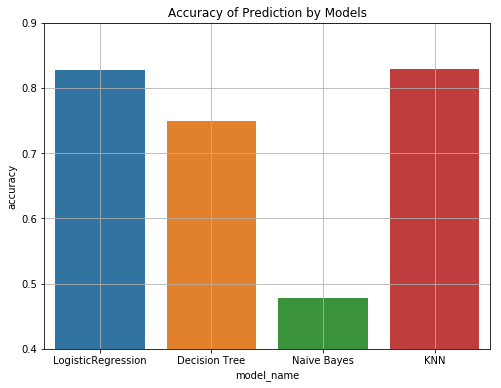

In [54]:
prediction(models,X_train, X_test, y_train, y_test)

### 3.2 Fine Tuning The Models by Grid Search

This section aims to select the best hyperparameter and how to examine with cross validations.
Due to large size of original data, only 10,000 rows are taken from shuffled data for demonstration.

In [73]:
X1, y1 = X[:10000],y[:10000]
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = .2, random_state=42)

In [74]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(random_state=42))
])

parameters = {
    'clf__class_weight':[None,'balanced'],
    'clf__penalty': ['l1','l2'],
    'clf__C': [0.001,1000]
}

cv = GridSearchCV(pipeline, param_grid=parameters)

best_model = cv.fit(X_train, y_train)

In [75]:
for key in cv.get_params().keys():
    print(key)

cv
error_score
estimator__memory
estimator__steps
estimator__scaler
estimator__clf
estimator__scaler__copy
estimator__scaler__with_mean
estimator__scaler__with_std
estimator__clf__C
estimator__clf__class_weight
estimator__clf__dual
estimator__clf__fit_intercept
estimator__clf__intercept_scaling
estimator__clf__max_iter
estimator__clf__multi_class
estimator__clf__n_jobs
estimator__clf__penalty
estimator__clf__random_state
estimator__clf__solver
estimator__clf__tol
estimator__clf__verbose
estimator__clf__warm_start
estimator
fit_params
iid
n_jobs
param_grid
pre_dispatch
refit
return_train_score
scoring
verbose


In [76]:
past = datetime.datetime.now()
best_model = cv.fit(X_train, y_train)
print('time elapsed: {:.0f}'.format((datetime.datetime.now() - past).seconds/60))

time elapsed: 1


In [77]:
#perform cross validation
past = datetime.datetime.now()
scores = cross_val_score(best_model, X1, y1, cv=5)
print(scores)
print('time elapsed: {:.0f}'.format((datetime.datetime.now() - past).seconds/60))

[ 0.8015992   0.825       0.808       0.8085      0.83291646]
time elapsed: 3


In [78]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.82 (+/- 0.02)


In [79]:
print('Best class_weight:', best_model.best_estimator_.get_params()['clf__class_weight'])
print('Best Penalty:', best_model.best_estimator_.get_params()['clf__penalty'])
print('Best C:', best_model.best_estimator_.get_params()['clf__C'])

Best class_weight: None
Best Penalty: l1
Best C: 1000


# 4. Conclusions

## Results from Analysis

1)	On Demographic data, <br>
&emsp;  i)	most of the members become members in 2017 and 2018. <br>
&emsp;  ii)	Age of member peak at 50, <br>
&emsp;  iii)	There are more male than female members, yet low spending groups are also dominant by male<br>
  
2)	Spending in average: In overall it is 104 dollar; in high spending group it is 283 dollars; while in low spending group it is 9 dollars.<br>

3)	In average high spending members spend in Starbucks once every 3 days. Consider together with point 2, it seems consumption in Starbucks is a consumption habit that offers with low difficulty(e.g. buy-5-get-5) seems not necessary.<br>

4)	Most of high spending members complete offers after receiving and viewing the details in most time. But there are also members complete offer without viewing since it is consumption habit as mentioned in point 4.<br>

5)	There is a cluster of members who spend exceptionally high(range around 400 to 1300 dollars) which there are one-shot high spending amount proportional to their income. <br>

6)	Consider similarity in consumption behavior and completion history to offers of a member, predicive model can achieve accuracy for 83% using Logistic Regression or KNN.


## Summary

Two parts in the analysis was challenging:
    1. Limited features of demographic informations of customers that there is no obvious indicator for customer behaviors, which I could only segment targeting groups for analysis through comparison.
    2. Understand the hidden logics in the transcript in order to work out flow matrix to facilitate anlysis and prediction
Moreover, some new information can only be deduced after data preparation process above like grouping members by similar behaviors in flow types(receive/view/complete offers).

During analysis the process itself always prompt you with new findings(or sadly, meaningless ones!) which may make you reflect the original analysis plan.
It is too easy to get loss in the crossroads - write down the goal of analysis in the beginning and follow through the analysis process to get the mind back track.